In [1]:
# Written by Suchith V
# Data is scraped from www.ggg.de and www.swg-chemnitz.de
# There are other two other notebook files which are used to scrape the data and store the data as .csv files using pandas

In [2]:
import pandas as pd
#from google.colab import files
 
 
#uploaded = files.upload()

In [3]:
pd. __version__ 

'1.4.4'

In [7]:
pd.set_option('min_rows',500)

In [9]:
#Load csv file from obtained from site 1
df_site_1=pd.read_csv('Rentals_swg_58.csv')

In [11]:
#Load csv file obtained from site 2
df_site_2=pd.read_csv('Rentals_976.csv')

In [13]:
#Concatenating two frames
df_site_1_2=pd.concat([df_site_1,df_site_2],ignore_index=True )

In [14]:
#Here initially we notice that Subject of the ad: "Name", Ad id: "Objekt ID"  
#Titel of the ad:"Objekttypen" are only for information
#and are irrelevant for our analysis
df_site_1_2.drop(['Unnamed: 0','Name','Objekt ID','Objekttypen'], axis=1,inplace=True)

In [15]:
list(df_site_1_2.columns)

['Adresse',
 'Etage',
 'Etagen im Haus',
 'Wohnfläche\xa0ca.',
 'Zimmer',
 'Schlafzimmer',
 'Badezimmer',
 'Balkone',
 'Heizungsart',
 'Wesentlicher Energieträger',
 'Baujahr',
 'Zustand',
 'Ausstattung',
 'Verfügbar ab',
 'Kaltmiete',
 'Nebenkosten',
 'Heizkosten',
 'Warmmiete',
 'Kaution',
 'Nutzfläche\xa0ca.',
 'Objekttyp',
 'Facilities',
 'Wohnräume',
 ' Geschoss',
 ' Wohnfläche',
 ' Gesamtmiete',
 'City',
 'Location',
 'Street',
 'RawdataFacilities',
 'Availability']

In [16]:
df_site_1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Adresse                     58 non-null     object 
 1   Etage                       57 non-null     object 
 2   Etagen im Haus              56 non-null     float64
 3   Wohnfläche ca.              58 non-null     object 
 4   Zimmer                      58 non-null     float64
 5   Schlafzimmer                58 non-null     float64
 6   Badezimmer                  58 non-null     float64
 7   Balkone                     48 non-null     float64
 8   Heizungsart                 46 non-null     object 
 9   Wesentlicher Energieträger  55 non-null     object 
 10  Baujahr                     58 non-null     float64
 11  Zustand                     58 non-null     object 
 12  Ausstattung                 13 non-null     object 
 13  Verfügbar ab                57 no

**Cleaning and extracing Features Stadtteil, Straße, City from Adresse column of first data frame (obtained from SWG Rental Site)**

In [17]:
#Extracting District names "Stadtteil" from "Adresse" column using regex where address details are packed
df_site_1_2['Stadtteil'] = df_site_1_2['Adresse'].str.extract(r'(\([a-zA-Z0-9_ßüö]*[\s\-]?[a-zA-Z0-9_ßü]*\))')

#Replacing () brackets from Stadtteil
df_site_1_2['Stadtteil'] = df_site_1_2['Stadtteil'].str.replace(r'[()]',"")
df_site_1_2['Stadtteil']=df_site_1_2['Stadtteil'].str.replace(r' ',"")

# Similarly from above Extracting Street Pattern using regex
df_site_1_2['Straße']=df_site_1_2['Adresse'].str.extract(r'([a-zA-Z\-\söü]*[\.platzngstraß]e?\s\d{2,3}[ab]?)')

# Replacing NaN of the city with Chemnitz as it is clear that "City" is Chemnitz mentioned in Adresse column
df_site_1_2['City']=df_site_1_2['City'].fillna(value='Chemnitz')

# Similarly from above Extracting Street Pattern using regex
#df_site_1_2['City']=df_site_1_2['Adresse'].str.extract(r'([Chemn]+[it]*z)')

#Dropping the "Adresse" column as we have extracted the required information
df_site_1_2.drop(['Adresse'],inplace=True,axis=1)


# Stadtteil, Straße, City - Categorical data

C:\Users\vsuch\AppData\Local\Temp\ipykernel_1268\2766031986.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_site_1_2['Stadtteil'] = df_site_1_2['Stadtteil'].str.replace(r'[()]',"")


**Merging values of features (obtained from two sites-SWG Rental and GGG Rental)- Gesamtmiete, Stadtteil, Straße, Wohnflache under single unique feature name**


In [18]:
# Gesamtmiete - Cost of Rental - Numerical Continuous

df_site_1_2['Gesamtmiete']=df_site_1_2[' Gesamtmiete'].fillna(df_site_1_2['Warmmiete'])
df_site_1_2.drop(['Warmmiete'],inplace=True,axis=1)

# As values of the rent "Gesamtmiete" contain string values we seperate the numbers from them

df_site_1_2['Gesamtmiete']=df_site_1_2['Gesamtmiete'].str.split(',').str[0]
df_site_1_2['Gesamtmiete']=df_site_1_2['Gesamtmiete'].str.replace(r'.',"")
df_site_1_2.drop([' Gesamtmiete'],inplace=True,axis=1)


#Stadtteil - Categorical

df_site_1_2['Stadtteil']=df_site_1_2['Stadtteil'].fillna(df_site_1_2['Location'])
df_site_1_2.drop(['Location'],inplace=True,axis=1)
df_site_1_2['Stadtteil']=df_site_1_2['Stadtteil'].str.replace(r' ',"")

#Straße- Categorical

df_site_1_2['Straße']=df_site_1_2['Straße'].fillna(df_site_1_2['Street'])
df_site_1_2.drop(['Street'],inplace=True,axis=1)


C:\Users\vsuch\AppData\Local\Temp\ipykernel_1268\962134805.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_site_1_2['Gesamtmiete']=df_site_1_2['Gesamtmiete'].str.replace(r'.',"")


In [19]:
#Wohnfläche ca. - Area in m2, Numerical Continuous

df_site_1_2['Wohnfläche ca.']=df_site_1_2['Wohnfläche\xa0ca.'].fillna(df_site_1_2[' Wohnfläche'])
df_site_1_2.drop(['Wohnfläche\xa0ca.',' Wohnfläche'],inplace=True,axis=1)

df_site_1_2['Wohnfläche ca.']=df_site_1_2['Wohnfläche ca.'].str.extract(r'(\d\d\d?,?\d?\d?)')
df_site_1_2['Wohnfläche ca.']=df_site_1_2['Wohnfläche ca.'].str.replace(r'[,]',".")

C:\Users\vsuch\AppData\Local\Temp\ipykernel_1268\4097893434.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_site_1_2['Wohnfläche ca.']=df_site_1_2['Wohnfläche ca.'].str.replace(r'[,]',".")


In [20]:
# 	Wohnräume - 1BHK,2BHK,3BHK etc. Categorical 

df_site_1_2['Wohnräume']=df_site_1_2['Wohnräume'].fillna(df_site_1_2['Zimmer'])
df_site_1_2.drop(['Zimmer'],inplace=True,axis=1)


In [21]:
#Verfügbar ab - Availability As this is only for information, we drop this featue

df_site_1_2.drop(['Verfügbar ab'],inplace=True,axis=1)

In [22]:
#Geschoss - Floor, Categorical, 1st floor, second floor, 3rd floor etc

df_site_1_2['Geschoss']=df_site_1_2[' Geschoss'].fillna(df_site_1_2['Etage'])
df_site_1_2.drop(['Etage',' Geschoss'],inplace=True,axis=1)

In [23]:
# Checking unique values in 'Geschoss' to have insights about the data
df_site_1_2['Geschoss'].unique()

array(['1', nan, '2', 'EG', '4', '5', '3', ' 3. Etage', ' 1. Etage',
       ' 2. Etage', ' Erdgeschoss', ' 5. Etage', ' 7. Etage', ' 4. Etage',
       ' 11. Etage', ' 9. Etage', ' 10. Etage', ' 6. Etage', ' 8. Etage',
       ' 0. Etage', ' Dachgeschoss'], dtype=object)

In [24]:
#Replacing ' Erdgeschoss' meaning Ground floor to '0' and extracting only numbers

df_site_1_2['Geschoss']=df_site_1_2['Geschoss'].str.replace(r'["EG"," Erdgeschoss"," Dachgeschoss"]',"0")
df_site_1_2['Geschoss']=df_site_1_2['Geschoss'].str.extract(r'(\s?\d)+')

C:\Users\vsuch\AppData\Local\Temp\ipykernel_1268\1525430042.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_site_1_2['Geschoss']=df_site_1_2['Geschoss'].str.replace(r'["EG"," Erdgeschoss"," Dachgeschoss"]',"0")


In [25]:
# Angaben (Information/Facilities) (All the information about each individual flat are grouped respectively from which we analyse and add as features)

df_site_1_2['Facilities']=df_site_1_2['Facilities'].fillna(df_site_1_2['RawdataFacilities'])
df_site_1_2.drop(['RawdataFacilities'],inplace=True,axis=1)
df_site_1_2.rename(columns={'Facilities':'Angaben'},inplace=True)

**We have so far restructured two same features in different dataframes from two sites into single feature name.**
**We have also performed cleaning and extraction of some of the features above** 

**Now we want to look into other facilities or infomation which are stored in "Angaben" column and create new features if necessary**

In [26]:
# Some apartments have some facilities while other dont have some 
#To get idea about all the available facilties, we may have a look at "Angaben". 
#However analysing all the info is cumbersome for each and every apartment
# We therefore find all the unique facilities which are extracted and stored as a whole in "Angaben column" and add them as our features if necessary 
x=df_site_1_2['Angaben'].str.split(r'\W')
y=[]
for i in range(0,1034):
  y.append(x[i])
# Now we have made a list of lists containing facilities
from collections import Counter
import collections
div=[individuals for i in y for individuals in i]
counter_output=collections.Counter(div)
counter_output
Final_list=[indivs for indivs,count in collections.Counter(div).items() if count>1]#Since output of Counter will be dictionary, we access items of the dictionary by items() method
Final_list
counter_output


Counter({'': 4767,
         'Badewanne': 43,
         'Balkon': 810,
         'Dachboden': 19,
         'Dusche': 262,
         'Neubau': 46,
         'Offene': 3,
         'Tageslichtbad': 35,
         'Wohnküche': 11,
         'mit': 1821,
         'Fenster': 338,
         'n': 218,
         '2': 4,
         'Bäder': 1,
         'Wanne': 838,
         'oder': 7,
         'Balkone': 1,
         'am': 1,
         'großen': 1,
         'Wohnzimmer': 6,
         'Abstellraum': 35,
         'x': 1,
         'Kammer': 12,
         'und': 83,
         'Keller': 962,
         'Altbau': 11,
         'Einbauküche': 71,
         'Gartennutzung': 11,
         'geräumige': 1,
         'EBK': 2,
         'Hausgarten': 6,
         'Bad': 1925,
         'Verglasung': 2,
         'Küche': 50,
         'Bodenkammer': 145,
         'frisch': 2,
         'renoviert': 2,
         'Haben': 1,
         'Sie': 4,
         'Interesse': 1,
         'an': 2,
         'dieser': 1,
         'anderen': 1,
       

In [175]:
#print(div)

In [27]:
# From above we see that few featues add value to the apartments 
# To name few
# "Baujayr"-Building construction year
# "Balkone"-Balcony
# Einbauküche/Fliesenspiegel - Fitted Kitchen
# Aufzug - Elevator
# Handtuchtrockner - Hand towel dryer
# Fahrradraum - Bicycle parking room
# Trockenraum - Drying room
# Dachboden/Bodenkammer - attic
# Spielplatz - Play Area
# Abstellraum - Storage Room
# Badewanne/Wanne - Bathtub
# Keller - Cellar

# We shal create a seperate column for each of the features

In [28]:
df_site_1_2.info()
# As we can see null values in 'Baujahr', we will fill this column from the information given in "Angaben" column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Etagen im Haus              56 non-null     float64
 1   Schlafzimmer                58 non-null     float64
 2   Badezimmer                  58 non-null     float64
 3   Balkone                     48 non-null     float64
 4   Heizungsart                 46 non-null     object 
 5   Wesentlicher Energieträger  55 non-null     object 
 6   Baujahr                     58 non-null     float64
 7   Zustand                     58 non-null     object 
 8   Ausstattung                 13 non-null     object 
 9   Kaltmiete                   58 non-null     object 
 10  Nebenkosten                 58 non-null     object 
 11  Heizkosten                  57 non-null     object 
 12  Kaution                     5 non-null      object 
 13  Nutzfläche ca.              33 no

In [29]:
#BauJahr-Year of construction, Numerical Discrete

# First we extract "Baujahr"-(Year) from "Angaben" column for the apartments in which NaN is present
df_site_1_2['Bau']=df_site_1_2['Angaben'].str.extract(r'(\d\d\d\d)+')
df_site_1_2['Baujahr']=df_site_1_2['Baujahr'].fillna(df_site_1_2['Bau'])
df_site_1_2.drop(['Bau'],inplace=True,axis=1)

In [30]:
#Balkone (If Balcony is there or not)(Yes/No) (1/0) - categorical but we are replacing with (1/0)

df_site_1_2['Balkon']=df_site_1_2['Angaben'].str.contains(r'(Balkon)+')
df_site_1_2['Balkone']=df_site_1_2['Balkone'].fillna(df_site_1_2['Balkon'])
#df_site_1_2['Balkone']=df_site_1_2['Balkone'].str.replace(r'2','1')
df_site_1_2['Balkone']=df_site_1_2['Balkone'].astype('int')

df_site_1_2.drop(['Balkon'],inplace=True,axis=1)

C:\Users\vsuch\AppData\Local\Temp\ipykernel_1268\912757408.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_site_1_2['Balkon']=df_site_1_2['Angaben'].str.contains(r'(Balkon)+')


In [31]:
# Einbauküche - Fitted Kitchen (Yes/No) (1/0) - categorical but we are replacing with (1/0)

df_site_1_2['Einbauküche']=df_site_1_2['Angaben'].str.contains('Einbauküche|Fliesenspiegel',regex=True)
df_site_1_2['Einbauküche']=df_site_1_2['Einbauküche'].astype('int')


In [32]:
# Aufzug - Elevator (Yes/No) (1/0) - categorical but we are replacing with (1/0)

df_site_1_2['Aufzug']=df_site_1_2['Angaben'].str.contains(r'(Aufzug)+')
df_site_1_2['Aufzug']=df_site_1_2['Aufzug'].astype('int')

C:\Users\vsuch\AppData\Local\Temp\ipykernel_1268\2412620235.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_site_1_2['Aufzug']=df_site_1_2['Angaben'].str.contains(r'(Aufzug)+')


In [33]:
# Fahrradraum - Bicycle parking (Yes/No) (1/0) - categorical but we are replacing with (1/0)

df_site_1_2['Fahrradraum']=df_site_1_2['Angaben'].str.contains('Fahrradraum')
df_site_1_2['Fahrradraum']=df_site_1_2['Fahrradraum'].astype('int')

In [34]:
# Distance from Zentrum (City center) is NA. As it might be a useful and interesting feature, we might add the column 
# which gives the distance
Location=df_site_1_2['Stadtteil'].unique() 
Location=list(Location)
Distance=['2.3','5.1','2.9','7.2','2.7','2.7','0','4.4','4.6','5.6','4.2','3.9','5.3','7.6','3.3','3.4','5.2','8.4','1.0','1.8','6.1','6.7','7.6','8.2','8.7','2.4','5.2','7.0','2.7']#Distance in km

In [35]:
# Convert to dictionary as key value pair

Location_dict=dict(zip(Location,Distance))

#We create a new column same as Stadtteil and apply map function which replaces the Stadtteil names with their respective distances present in dictionary

df_site_1_2['Distance']=df_site_1_2['Stadtteil']
df_site_1_2['Distance']=df_site_1_2['Distance'].map(Location_dict)

In [36]:
# Trockenraum - Drying room (Yes/No) (1/0) - categorical but we are replacing with (1/0)

df_site_1_2['Trockenraum']=df_site_1_2['Angaben'].str.contains('Trockenraum')
df_site_1_2['Trockenraum']=df_site_1_2['Trockenraum'].astype('int')

In [37]:
# Fahrradraum - Bicycle Parking lot (Yes/No) (1/0) - categorical but we are replacing with (1/0)

df_site_1_2['Fahrradraum']=df_site_1_2['Angaben'].str.contains('Fahrradraum')
df_site_1_2['Fahrradraum']=df_site_1_2['Fahrradraum'].astype('int')

In [38]:
#Spielplatz - Play Area (Yes/No) (1/0) - categorical but we are replacing with (1/0)

df_site_1_2['Spielplatz']=df_site_1_2['Angaben'].str.contains('Spielplatz')
df_site_1_2['Spielplatz']=df_site_1_2['Spielplatz'].astype('int')

In [39]:
#Abstellraum-storage Room (Yes/No) (1/0) - categorical but we are replacing with (1/0)

df_site_1_2['Abstellraum']=df_site_1_2['Angaben'].str.contains('Abstellraum')
df_site_1_2['Abstellraum']=df_site_1_2['Abstellraum'].astype('int')


In [40]:
#Handtuchtrockner- Hand towel Dryer (Yes/No) (1/0) - categorical but we are replacing with (1/0)

df_site_1_2['Handtuchtrockner']=df_site_1_2['Angaben'].str.contains('Handtuchtrockner')
df_site_1_2['Handtuchtrockner']=df_site_1_2['Handtuchtrockner'].astype('int')


In [41]:
# Dachboden/Bodenkammer - Attic/Garatte (Yes/No) (1/0) - categorical but we are replacing with (1/0)

df_site_1_2['Dachboden']=df_site_1_2['Angaben'].str.contains('Dachboden|Bodenkammer')
df_site_1_2['Dachboden']=df_site_1_2['Dachboden'].astype('int')

In [42]:
# Keller - Cellar (Yes/No) (1/0) - categorical but we are replacing with (1/0)

df_site_1_2['Keller']=df_site_1_2['Angaben'].str.contains('Keller')
df_site_1_2['Keller']=df_site_1_2['Keller'].astype('int')

In [43]:
# Badewanne/Duscher - Shower or Bath tub- Categorical

df_site_1_2[['Wanne','Dusche']]=df_site_1_2['Angaben'].str.extract(r'([Ww]?anne)+|(Dusche)+')
df_site_1_2['Wanne']=df_site_1_2['Wanne'].str.replace(r'wanne','Wanne')
df_site_1_2['Wanne'].fillna(value="",inplace=True)
df_site_1_2['Dusche'].fillna(value="",inplace=True)
df_site_1_2['Wanne/Dusche']=df_site_1_2['Wanne']+df_site_1_2['Dusche']
df_site_1_2.drop(['Wanne'],inplace=True,axis=1)
df_site_1_2.drop(['Dusche'],inplace=True,axis=1)


In [44]:
df_site_1_2.drop(['Angaben'],inplace=True,axis=1)

**Now We have all the features that we feel important as columns. Now let us analyse data**

In [45]:
df_site_1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Etagen im Haus              56 non-null     float64
 1   Schlafzimmer                58 non-null     float64
 2   Badezimmer                  58 non-null     float64
 3   Balkone                     1034 non-null   int32  
 4   Heizungsart                 46 non-null     object 
 5   Wesentlicher Energieträger  55 non-null     object 
 6   Baujahr                     1034 non-null   object 
 7   Zustand                     58 non-null     object 
 8   Ausstattung                 13 non-null     object 
 9   Kaltmiete                   58 non-null     object 
 10  Nebenkosten                 58 non-null     object 
 11  Heizkosten                  57 non-null     object 
 12  Kaution                     5 non-null      object 
 13  Nutzfläche ca.              33 no

In [46]:

#"Etagen in Haus"- total floors of the building (Note: We already have floor numbers and not total floors as "Geschoss")
#"Schlaf Zimmer" - no. of bedrooms(excluding living room) (Note: we already have number of rooms including living room as "Wohnraume" Column)
#Badezimmer" -no. of bathrooms
#"Kalmiete, NebenKosten,Heizkosten" - Total costs including Base rent, heating costs, maintenance costs are structured under "Gesamtmiete"
#"Kaution, objekttyp" 
# "Nutzfläche ca." - Living area (Note: We already added built-up area column as Wohnfläche ca.)

#From above we see that the large null values features can be dropped. 
# Note that some of these features are already structured in different feature columns

df_site_1_2.dropna(axis=1,thresh=1033,inplace=True)


In [47]:
df=df_site_1_2

In [48]:
df['Baujahr']=df['Baujahr'].astype('int')

In [49]:
# Calculating age of the building

from datetime import date
date.today().year
df['Age of Building']=df['Baujahr'].apply(lambda x: date.today().year-x)

In [50]:
#We might not be interested in Year of construction as we have created age of the building column from it

df.drop(['Baujahr'],inplace = True,axis=1)

In [51]:
#df = df.sample(frac = 1)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Balkone           1034 non-null   int32  
 1   Wohnräume         1034 non-null   float64
 2   City              1034 non-null   object 
 3   Stadtteil         1034 non-null   object 
 4   Straße            1034 non-null   object 
 5   Gesamtmiete       1034 non-null   object 
 6   Wohnfläche ca.    1034 non-null   object 
 7   Geschoss          1033 non-null   object 
 8   Einbauküche       1034 non-null   int32  
 9   Aufzug            1034 non-null   int32  
 10  Fahrradraum       1034 non-null   int32  
 11  Distance          1034 non-null   object 
 12  Trockenraum       1034 non-null   int32  
 13  Spielplatz        1034 non-null   int32  
 14  Abstellraum       1034 non-null   int32  
 15  Handtuchtrockner  1034 non-null   int32  
 16  Dachboden         1034 non-null   int32  


In [53]:
col_names_1=['City','Stadtteil','Straße','Wohnfläche ca.','Wohnräume','Geschoss','Balkone','Age of Building','Distance','Einbauküche','Aufzug','Fahrradraum','Trockenraum','Spielplatz','Abstellraum','Dachboden','Handtuchtrockner','Keller','Wanne/Dusche','Gesamtmiete']

In [54]:
#Shuffling columns
df=df[col_names_1]

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              1034 non-null   object 
 1   Stadtteil         1034 non-null   object 
 2   Straße            1034 non-null   object 
 3   Wohnfläche ca.    1034 non-null   object 
 4   Wohnräume         1034 non-null   float64
 5   Geschoss          1033 non-null   object 
 6   Balkone           1034 non-null   int32  
 7   Age of Building   1034 non-null   int64  
 8   Distance          1034 non-null   object 
 9   Einbauküche       1034 non-null   int32  
 10  Aufzug            1034 non-null   int32  
 11  Fahrradraum       1034 non-null   int32  
 12  Trockenraum       1034 non-null   int32  
 13  Spielplatz        1034 non-null   int32  
 14  Abstellraum       1034 non-null   int32  
 15  Dachboden         1034 non-null   int32  
 16  Handtuchtrockner  1034 non-null   int32  


In [56]:
# We have one missing value in Geschoss - Floor number. 

df['Geschoss'].fillna(value=0,inplace=True)

C:\Users\vsuch\AppData\Local\Temp\ipykernel_1268\1123832303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Geschoss'].fillna(value=0,inplace=True)


In [57]:
df = df.astype({'Wohnfläche ca.':'float','Gesamtmiete':'float','Distance':'float'})

In [58]:
dtype_cat='object'

In [59]:
df=df.astype({'Wohnräume':'int','Geschoss':dtype_cat,'Balkone':dtype_cat,'Age of Building':'int','Einbauküche':dtype_cat,'Aufzug':dtype_cat,'Fahrradraum':dtype_cat,'Trockenraum':dtype_cat,'Spielplatz':dtype_cat,'Abstellraum':dtype_cat,'Dachboden':dtype_cat,'Handtuchtrockner':dtype_cat,'Keller':dtype_cat,'Wanne/Dusche':dtype_cat})

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              1034 non-null   object 
 1   Stadtteil         1034 non-null   object 
 2   Straße            1034 non-null   object 
 3   Wohnfläche ca.    1034 non-null   float64
 4   Wohnräume         1034 non-null   int32  
 5   Geschoss          1034 non-null   object 
 6   Balkone           1034 non-null   object 
 7   Age of Building   1034 non-null   int32  
 8   Distance          1034 non-null   float64
 9   Einbauküche       1034 non-null   object 
 10  Aufzug            1034 non-null   object 
 11  Fahrradraum       1034 non-null   object 
 12  Trockenraum       1034 non-null   object 
 13  Spielplatz        1034 non-null   object 
 14  Abstellraum       1034 non-null   object 
 15  Dachboden         1034 non-null   object 
 16  Handtuchtrockner  1034 non-null   object 


In [61]:
df.describe()

,Wohnfläche ca.,Wohnräume,Age of Building,Distance,Gesamtmiete
count,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,57.234545,2.481625,53.366538,4.182979,443.181818
std,16.037565,0.877905,19.874390,2.219482,125.158106
min,24.000000,1.000000,24.000000,0.000000,199.000000
25%,46.000000,2.000000,42.000000,2.700000,370.250000
50%,56.000000,3.000000,47.000000,4.200000,428.000000
75%,68.000000,3.000000,60.000000,6.100000,505.000000
max,151.000000,7.000000,143.000000,8.700000,1124.000000


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
#fig,axes = plt.subplots(1,2,figsize=(18,10))

#sns.set(rc={'figure.figsize':(18,10)})
#sns.boxplot(data=df,x=df['Wohnräume'],y = df['Wohnfläche ca.'])


#sns.boxplot(df['Wohnräume'],ax=axes[0,0])
#sns.boxplot(df['Geschoss'],ax=axes[1,0])
#sns.boxplot(df['Gesamtmiete'],ax=axes[0,1])

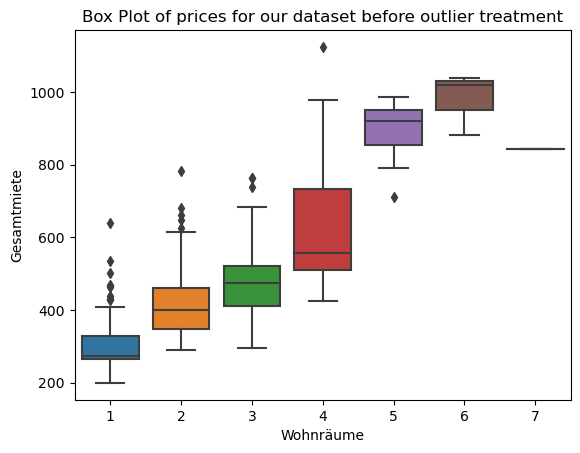

In [63]:
sns.boxplot(data=df,x=df['Wohnräume'],y = df['Gesamtmiete']).set(title='Box Plot of prices for our dataset before outlier treatment')
plt.savefig('Box Plot of prices for our dataset before outlier treatment.png')

In [64]:
# From above box plot for numerical features we find that there are outliers. We may drop the rows of the outliers by using IQR method or 3 SD method 
# Q1 - 1.5IQR
# Q3 + 1.5IQR


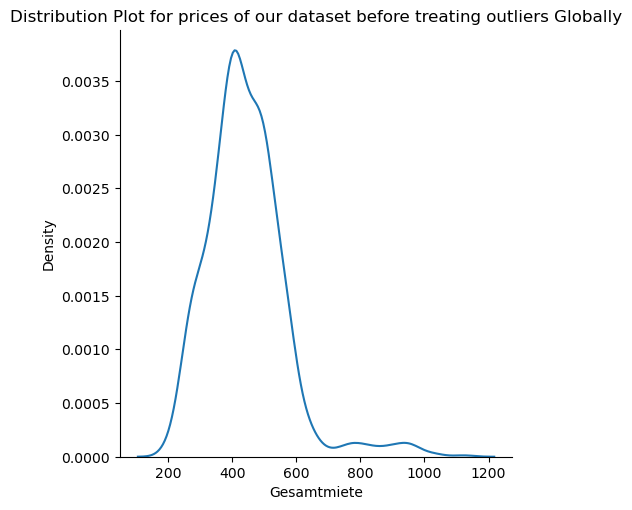

In [65]:
sns.displot(df['Gesamtmiete'],kind='kde').set(title='Distribution Plot for prices of our dataset before treating outliers Globally' )
#sns.displot(df['Wohnfläche ca.'],kind='kde')
plt.savefig("Distribution Plot for prices of our dataset before treating outliers Globally")

In [66]:
import numpy as np
np.corrcoef(df['Wohnfläche ca.'],df['Gesamtmiete'])


array([[1.        , 0.94063483],
       [0.94063483, 1.        ]])

In [67]:
# From above distribution plot, we see that the feature Gesamtmiete is Right or positive skewed, means they have outliers on the upper quartiles/percentiles
# We shall also check for skewness and kurtosis


In [68]:
import scipy
#print("Skew for Wohnfläche ca. is",scipy.stats.skew(df['Wohnfläche ca.']))
#print("Kurtosis for Wohnfläche ca. is",scipy.stats.kurtosis(df['Wohnfläche ca.']))

print("Skew for Gesamtmiete is",scipy.stats.skew(df['Gesamtmiete']))
print("Kurtosis for Gesamtmiete is",scipy.stats.kurtosis(df['Gesamtmiete']))



Skew for Gesamtmiete is 1.4452618633535637
Kurtosis for Gesamtmiete is 4.330279765710023


In [69]:
# From above we see that the numerical continuous feature Gesamtmiete is leptokurtic and signifies the presence of outliers

In [70]:
# Treating outliers on whole data set
from scipy import stats
#IQR_Wohnfla=scipy.stats.iqr(df['Wohnfläche ca.'])
#print("Iqr for Wohnflach",IQR_Wohnfla)
IQR_Gesamt=scipy.stats.iqr(df['Gesamtmiete'])
print("Iqr for Gesamt",IQR_Gesamt)


Iqr for Gesamt 134.75


In [71]:
import numpy as np
#Q3_Wohnfla=np.percentile(df['Wohnfläche ca.'],75)
#print("Q3 for Wohnflach",Q3_Wohnfla)
Q3_Gesamt=np.percentile(df['Gesamtmiete'],75)
print("Q3 for Gesamt",Q3_Gesamt)

Q3 for Gesamt 505.0


**Outlier Treatment For whole data set. Later we will do outlier treatment for individual type of Wohnraume to study the impact of features on price**

In [72]:
#df_out_treat_Wohnfla=df[df['Wohnfläche ca.']<(Q3_Wohnfla+1.5*IQR_Wohnfla)]

In [73]:
#df_out_treat=df_out_treat_Wohnfla[df_out_treat_Wohnfla['Gesamtmiete']<(Q3_Gesamt+1.5*IQR_Gesamt)]
df_out_treat=df[df['Gesamtmiete']<(Q3_Gesamt+1.5*IQR_Gesamt)]

In [74]:
#sns.boxplot(data=df_out_treat,x=df_out_treat['Wohnräume'],y = df_out_treat['Wohnfläche ca.'])

[Text(0.5, 1.0, 'Box Plot for prices of 1BHK, 2BHK, 3BHK, 4BHK after treating outliers Globally')]

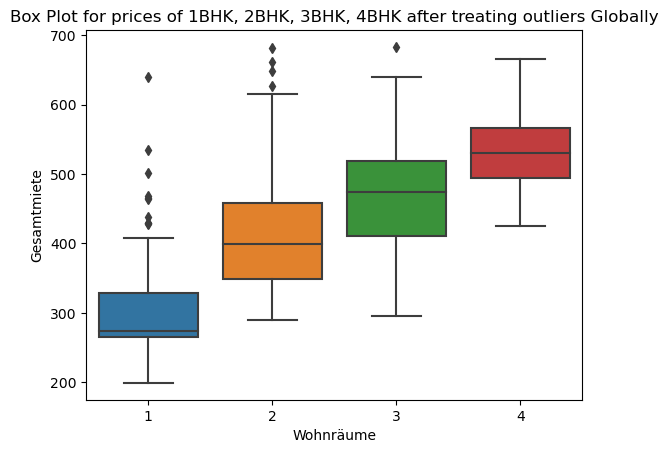

In [75]:
sns.boxplot(data=df_out_treat,x=df_out_treat['Wohnräume'],y = df_out_treat['Gesamtmiete']).set(title='Box Plot for prices of 1BHK, 2BHK, 3BHK, 4BHK after treating outliers Globally' )

In [76]:
df_out_treat.describe()

,Wohnfläche ca.,Wohnräume,Age of Building,Distance,Gesamtmiete
count,997.000000,997.000000,997.000000,997.000000,997.000000
mean,55.352437,2.404213,53.488465,4.210030,427.300903
std,12.510224,0.773625,19.698814,2.202436,94.041325
min,24.000000,1.000000,24.000000,0.000000,199.000000
25%,46.000000,2.000000,42.000000,2.700000,364.000000
50%,56.000000,3.000000,47.000000,4.200000,424.000000
75%,66.000000,3.000000,61.000000,6.100000,498.000000
max,92.000000,4.000000,143.000000,8.700000,683.000000


In [77]:
#print("Skew for Wohnfläche ca. is",scipy.stats.skew(df_out_treat['Wohnfläche ca.']))
#print("Kurtosis for Wohnfläche ca. is",scipy.stats.kurtosis(df_out_treat['Wohnfläche ca.']))

print("Skew for Gesamtmiete is",scipy.stats.skew(df_out_treat['Gesamtmiete']))
print("Kurtosis for Gesamtmiete is",scipy.stats.kurtosis(df_out_treat['Gesamtmiete']))

Skew for Gesamtmiete is -0.008224971185606276
Kurtosis for Gesamtmiete is -0.5308082069041369


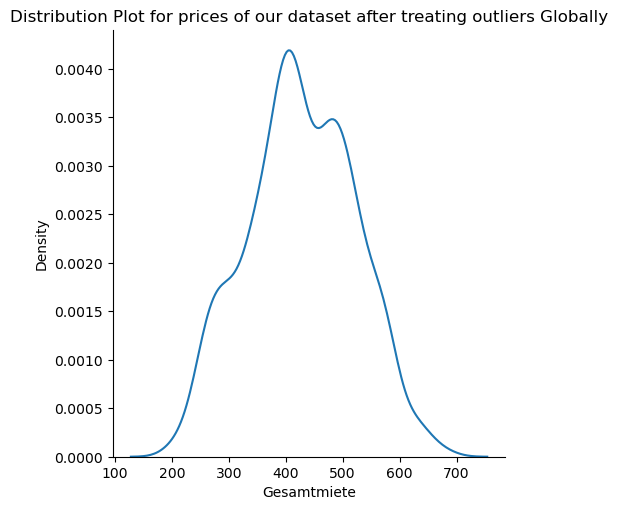

In [78]:
#from google.colab import files
sns.displot(df_out_treat['Gesamtmiete'],kind='kde').set(title='Distribution Plot for prices of our dataset after treating outliers Globally' )
plt.savefig("Distribution Plot for prices of our dataset after treating outliers Globally")

In [79]:
#sns.displot(df_out_treat['Wohnfläche ca.'],kind='kde')

In [80]:
#Maximum and Minimum price and Area as per Location w/ or w/o Balkone
df_out_treat.groupby(['Wohnräume','Balkone']).agg({'Gesamtmiete':[np.mean,min,max],'Wohnfläche ca.':[np.mean,min,max]})

Gesamtmiete               Wohnfläche ca.            
                         mean    min    max           mean   min   max
Wohnräume Balkone                                                     
1         0        302.761905  199.0  535.0      35.095238  26.0  51.0
          1        298.832000  203.0  640.0      35.904000  24.0  64.0
2         0        386.712644  289.0  648.0      50.636667  39.0  86.0
          1        413.534413  297.0  681.0      52.232227  36.0  92.0
3         0        432.902098  360.0  639.0      59.545455  50.0  85.0
          1        490.008772  295.0  683.0      64.013538  47.0  90.0
4         0        509.250000  425.0  575.0      69.125000  67.0  72.0
          1        539.916667  451.0  666.0      70.583333  68.0  90.0

In [81]:
#df_out_treat.groupby(['Wohnräume','Distance']).agg({'Gesamtmiete':[np.mean,min,max],'Wohnfläche ca.':[np.mean,min,max]})

In [82]:
# From above we can see that mean,min and max values is greater for flats having balcony than for flats without balcony  
# However there is excemption in case of 1BHK. This might be because of presence of outliers within individual type
# # We would like to see the impact of features of 1bhk,2bhk,3bhk and 4bhk on prices individually after treating outliers within each type

In [83]:
Filtr_1bhk=df_out_treat['Wohnräume']==1
Filtr_2bhk=df_out_treat['Wohnräume']==2
Filtr_3bhk=df_out_treat['Wohnräume']==3
Filtr_4bhk=df_out_treat['Wohnräume']==4


In [84]:
df_1=df_out_treat[Filtr_1bhk]
df_2=df_out_treat[Filtr_2bhk]
df_3=df_out_treat[Filtr_3bhk]
df_4=df_out_treat[Filtr_4bhk]


***1BHK***

In [85]:
#print("Skew for Wohnfläche ca. is",scipy.stats.skew(df_1['Wohnfläche ca.']))
#print("Kurtosis for Wohnfläche ca. is",scipy.stats.kurtosis(df_1['Wohnfläche ca.']))

print("Skew for Gesamtmiete is",scipy.stats.skew(df_1['Gesamtmiete']))
print("Kurtosis for Gesamtmiete is",scipy.stats.kurtosis(df_1['Gesamtmiete']))



Skew for Gesamtmiete is 1.9648483182526535
Kurtosis for Gesamtmiete is 5.742605931691434


In [86]:
#We see that there are outliers within 1bhk dataset

In [87]:
#IQR_Wohnfla=scipy.stats.iqr(df_1['Wohnfläche ca.'])
#print("Iqr for Wohnflach",IQR_Wohnfla)
IQR_Gesamt=scipy.stats.iqr(df_1['Gesamtmiete'])
print("Iqr for Gesamt",IQR_Gesamt)

#Q3_Wohnfla=np.percentile(df_1['Wohnfläche ca.'],75)
#print("Q3 for Wohnflach",Q3_Wohnfla)
Q3_Gesamt=np.percentile(df_1['Gesamtmiete'],75)
print("Q3 for Gesamt",Q3_Gesamt)

#Q1_Wohnfla=np.percentile(df_1['Wohnfläche ca.'],75)
#print("Q3 for Wohnflach",Q1_Wohnfla)
#Q1_Gesamt=np.percentile(df_1['Gesamtmiete'],25)
#print("Q1 for Gesamt",Q1_Gesamt)

#df_out_treat_1=df_1[(df_1['Wohnfläche ca.']<(Q3_Wohnfla+1.5*IQR_Wohnfla)) & (df_1['Gesamtmiete']<(Q3_Gesamt+1.5*IQR_Gesamt))]
df_out_treat_1=df_1[df_1['Gesamtmiete']<(Q3_Gesamt+1.5*IQR_Gesamt)]

Iqr for Gesamt 64.0
Q3 for Gesamt 329.0


**2BHK**

In [88]:
#print("Skew for Wohnfläche ca. is",scipy.stats.skew(df_2['Wohnfläche ca.']))
#print("Kurtosis for Wohnfläche ca. is",scipy.stats.kurtosis(df_2['Wohnfläche ca.']))

print("Skew for Gesamtmiete is",scipy.stats.skew(df_2['Gesamtmiete']))
print("Kurtosis for Gesamtmiete is",scipy.stats.kurtosis(df_2['Gesamtmiete']))

Skew for Gesamtmiete is 0.7049523406864046
Kurtosis for Gesamtmiete is 0.43954147032987034


In [89]:
# 
#IQR_Wohnfla=scipy.stats.iqr(df_2['Wohnfläche ca.'])
#print("Iqr for Wohnflach",IQR_Wohnfla)
IQR_Gesamt=scipy.stats.iqr(df_2['Gesamtmiete'])
print("Iqr for Gesamt",IQR_Gesamt)

#Q3_Wohnfla=np.percentile(df_2['Wohnfläche ca.'],75)
#print("Q3 for Wohnflach",Q3_Wohnfla)
Q3_Gesamt=np.percentile(df_2['Gesamtmiete'],75)
print("Q3 for Gesamt",Q3_Gesamt)

#df_out_treat_Wohnfla=df_2[df_2['Wohnfläche ca.']<(Q3_Wohnfla+1.5*IQR_Wohnfla)]
#df_out_treat_2=df_out_treat_Wohnfla[df_out_treat_Wohnfla['Gesamtmiete']<(Q3_Gesamt+1.5*IQR_Gesamt)]
df_out_treat_2=df_2[df_2['Gesamtmiete']<(Q3_Gesamt+1.5*IQR_Gesamt)]

Iqr for Gesamt 110.75
Q3 for Gesamt 458.75


In [90]:
#df_out_treat_2.groupby(['Balkone']).agg({'Gesamtmiete':[np.mean,min,max],'Wohnfläche ca.':[np.mean,min,max]})

**3BHK**

In [91]:
#print("Skew for Wohnfläche ca. is",scipy.stats.skew(df_3['Wohnfläche ca.']))
#print("Kurtosis for Wohnfläche ca. is",scipy.stats.kurtosis(df_3['Wohnfläche ca.']))

print("Skew for Gesamtmiete is",scipy.stats.skew(df_3['Gesamtmiete']))
print("Kurtosis for Gesamtmiete is",scipy.stats.kurtosis(df_3['Gesamtmiete']))

Skew for Gesamtmiete is 0.29338738796620567
Kurtosis for Gesamtmiete is -0.6237746660276917


In [92]:
# Here we might not treat as the values are around 0 for both skew and kurtosis. This can also be verified with box plot above
df_out_treat_3 = df_3

**4BHK**

In [93]:
#print("Skew for Wohnfläche ca. is",scipy.stats.skew(df_4['Wohnfläche ca.']))
#print("Kurtosis for Wohnfläche ca. is",scipy.stats.kurtosis(df_4['Wohnfläche ca.']))

print("Skew for Gesamtmiete is",scipy.stats.skew(df_4['Gesamtmiete']))
print("Kurtosis for Gesamtmiete is",scipy.stats.kurtosis(df_4['Gesamtmiete']))

Skew for Gesamtmiete is 0.2204006055267836
Kurtosis for Gesamtmiete is 0.24499573917281037


In [94]:
# Seeing the values of kurtosis and skew, we might not do outlier treatment 4BHKs
df_out_treat_4 = df_4


#df_Wohnfla=scipy.stats.iqr(df_4['Wohnfläche ca.'])
#print("Iqr for Wohnflach",IQR_Wohnfla)
#IQR_Gesamt=scipy.stats.iqr(df_4['Gesamtmiete'])
#print("Iqr for Gesamt",IQR_Gesamt)

#Q3_Wohnfla=np.percentile(df_4['Wohnfläche ca.'],75)
#print("Q3 for Wohnflach",Q3_Wohnfla)
#Q3_Gesamt=np.percentile(df_4['Gesamtmiete'],75)
#print("Q3 for Gesamt",Q3_Gesamt)

#df_out_treat_Wohnfla=df_4[df_4['Wohnfläche ca.']<(Q3_Wohnfla+1.5*IQR_Wohnfla)]
#df_out_treat_4=df_out_treat_Wohnfla[df_out_treat_Wohnfla['Gesamtmiete']<(Q3_Gesamt+1.5*IQR_Gesamt)]
#df_out_treat_4=df_out_treat_Wohnfla

In [95]:
#print("Skew for Wohnfläche ca. is",scipy.stats.skew(df_out_treat_4['Wohnfläche ca.']))
#print("Kurtosis for Wohnfläche ca. is",scipy.stats.kurtosis(df_out_treat_4['Wohnfläche ca.']))

***Combined Data Set after treating outliers individually***

In [96]:
df_combined=pd.concat([df_out_treat_1,df_out_treat_2,df_out_treat_3,df_out_treat_4],ignore_index=True )

In [97]:
df_combined.groupby(['Distance']).agg({'Gesamtmiete':[np.mean]})

,Gesamtmiete
,mean
Distance,
0.0,461.750000
1.0,495.882353
1.8,491.833333
2.3,506.900000
2.4,449.162162
2.7,453.661765
2.9,453.089286
3.3,423.750000


In [98]:
#sns.boxplot(data=df_combined,x=df_combined['Wohnräume'],y = df_combined['Wohnfläche ca.'])

[Text(0.5, 1.0, 'Box Plot for prices of 1BHK, 2BHK, 3BHK, 4BHK after treating outliers individually')]

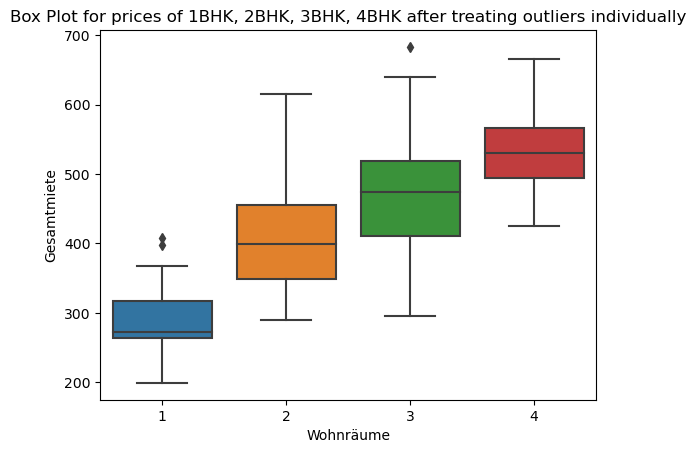

In [99]:
sns.boxplot(data=df_combined,x=df_combined['Wohnräume'],y = df_combined['Gesamtmiete']).set(title='Box Plot for prices of 1BHK, 2BHK, 3BHK, 4BHK after treating outliers individually' )

**Descriptie Statistics for 1BHK,2BHK,3BHK,4BHK seperately as we are interested in kinds of BHK (which is more meaningful) but not all Statistics for all combined**

In [100]:

from numpy.lib.function_base import quantile
df_combined.groupby(['Wohnräume']).agg({'Wohnräume':['count'],'Gesamtmiete':['quantile(0.25)'],'Gesamtmiete':[np.mean,min,max,np.std,lambda x: np.percentile(x,25),lambda x: np.percentile(x,50),lambda x: np.percentile(x,75)],'Wohnfläche ca.':[np.mean,min,max,np.std,lambda x: np.percentile(x,25),lambda x: np.percentile(x,50),lambda x: np.percentile(x,75)]})
#df_combined.groupby(['Wohnräume'])['Wohnräume'].count()

Wohnräume Gesamtmiete                                      \
              count        mean    min    max        std <lambda_0>   
Wohnräume                                                             
1               136  286.132353  199.0  408.0  41.141636     263.75   
2               330  403.545455  289.0  615.0  70.420272     348.00   
3               485  473.171134  295.0  683.0  69.269220     411.00   
4                32  532.250000  425.0  666.0  51.426741     493.50   

                                Wohnfläche ca.                        \
          <lambda_1> <lambda_2>           mean   min   max       std   
Wohnräume                                                              
1              272.5     316.75      34.764706  24.0  43.0  3.779570   
2              399.0     455.00      51.359848  36.0  79.0  8.068147   
3              474.0     519.00      62.696144  47.0  90.0  7.872387   
4              530.0     566.75      70.218750  67.0  90.0  4.688589   

                                            
          <lambda_0> <lambda_1> <lambda_2>  
Wohnräume                                   
1               33.0      36.00      36.00  
2               46.0      50.46      58.00  
3               56.0      60.00      70.00  
4               68.0      69.00      69.25

***lambda_0 - (Q1)
lambda_1 - (Q2)
lambda_0 - (Q3)***

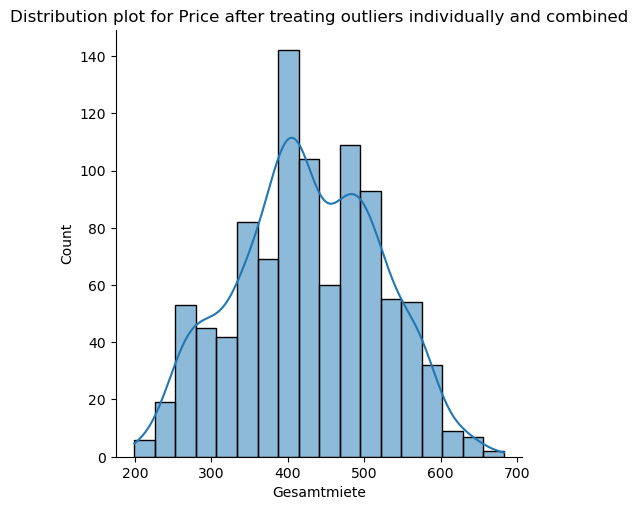

In [101]:
#fig,axes = plt.subplots(2,2,figsize=(18,10))
#sns.displot(df_combined['Wohnfläche ca.'],kde=True)
sns.displot(df_combined['Gesamtmiete'],kde=True).set(title="Distribution plot for Price after treating outliers individually and combined")
plt.savefig('Distribution plot for Price after treating outliers individually and combined')

C:\Users\vsuch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


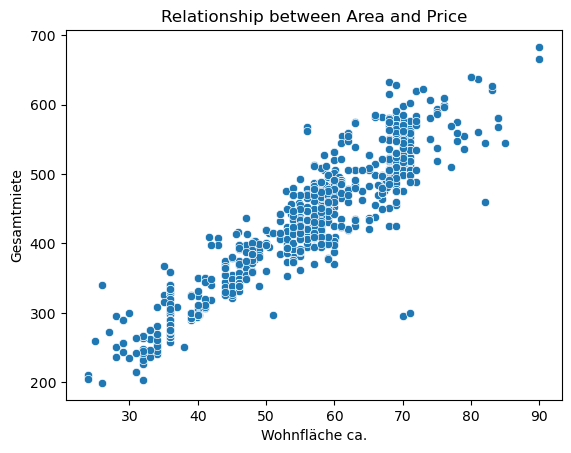

In [102]:
#sns.set(rc={'figure.figsize':(10,7)})
sns.scatterplot(df_combined['Wohnfläche ca.'],df_combined['Gesamtmiete']).set(title="Relationship between Area and Price")
plt.savefig('Relationship between Area and Price')
#sns.scatterplot(df_combined['Wohnräume'],df_combined['Gesamtmiete'])

**We can see that scatter plot between Flat area and price are correlated**


C:\Users\vsuch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


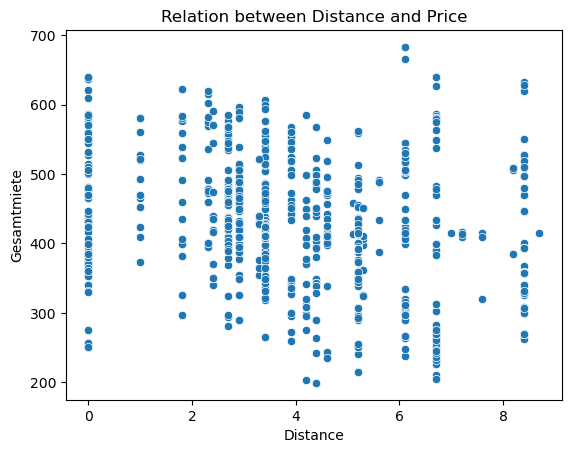

In [103]:
sns.scatterplot(df_combined['Distance'],df_combined['Gesamtmiete']).set(title="Relation between Distance and Price")
plt.savefig("Relation between Distance and Price")

**There is no relation between Distance and Price**

C:\Users\vsuch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


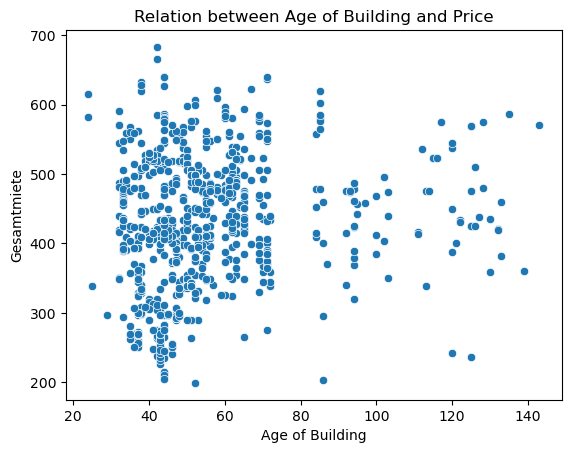

In [104]:
sns.scatterplot(df_combined['Age of Building'],df_combined['Gesamtmiete']).set(title="Relation between Age of Building and Price")
plt.savefig("Relation between Age of Building and Price")

**There is no relation between Price and Age of Building**

In [105]:
# Correlation nearly equal t0 1
np.corrcoef(df_combined['Gesamtmiete'],df_combined['Wohnfläche ca.'])

array([[1.        , 0.92413243],
       [0.92413243, 1.        ]])

In [106]:
#Maximum and Minimum price, as per Location and Type
df_combined.groupby(['Stadtteil','Wohnräume']).agg({'Gesamtmiete':[np.mean,min,max]})

Gesamtmiete              
                                   mean    min    max
Stadtteil         Wohnräume                          
Altchemnitz       2          410.000000  387.0  433.0
                  3          489.888889  487.0  492.0
Altendorf         1          303.583333  203.0  408.0
                  2          434.333333  341.0  585.0
                  3          424.250000  377.0  462.0
Bernsdorf         1          277.333333  259.0  300.0
                  2          347.833333  327.0  462.0
                  3          500.000000  295.0  567.0
Borna-Heinersdorf 1          398.000000  398.0  398.0
                  2          324.333333  324.0  325.0
                  3          392.666667  362.0  410.0
                  4          451.000000  451.0  451.0
Erfenschlag       2          320.000000  320.0  320.0
Furth             2          364.666667  354.0  376.0
                  3          433.625000  428.0  440.0
                  4          522.000000  522.0  522.0
Gablenz           1          292.000000  265.0  319.0
                  2          402.538462  322.0  598.0
                  3          486.312500  408.0  607.0
                  4          550.750000  547.0  562.0
Glösa-Draisdorf   2          413.333333  409.0  417.0
Helbersdorf       1          238.000000  215.0  255.0
                  2          333.781250  289.0  513.0
                  3          392.440000  373.0  562.0
                  4          490.333333  485.0  494.0
Hilbersdorf       2          436.000000  414.0  458.0
Hutholz           1          303.035714  262.0  368.0
                  2          394.333333  300.0  550.0
                  3          473.400000  393.0  632.0
                  4          510.000000  510.0  510.0
...                                 ...    ...    ...
Morgenleite       1          262.205128  205.0  313.0
                  2          395.571429  383.0  399.0
                  3          516.583333  426.0  639.0
                  4          582.125000  564.0  627.0
Rabenstein        3          413.000000  409.0  415.0
Reichenbrand      2          385.000000  385.0  385.0
                  3          507.000000  505.0  509.0
Röhrsdorf         3          415.000000  415.0  415.0
Schloßchemnitz    1          349.230769  340.0  350.0
                  2          419.900000  370.0  439.0
                  3          562.857143  474.0  590.0
Schönau           2          396.333333  338.0  479.0
                  3          354.000000  349.0  359.0
Siegmar           2          415.000000  415.0  415.0
Sonnenberg        1          302.500000  281.0  324.0
                  2          417.500000  369.0  464.0
                  3          483.967742  389.0  585.0
                  4          425.000000  425.0  425.0
SonnenbergNord    2          530.000000  506.0  554.0
                  3          480.500000  480.0  481.0
SonnenbergSüd     1          295.500000  294.0  297.0
                  2          402.400000  391.0  409.0
                  3          483.000000  470.0  492.0
Yorckgebiet       1          256.600000  199.0  289.0
                  2          371.956522  329.0  568.0
                  3          492.540541  409.0  523.0
Zentrum           1          280.285714  251.0  340.0
                  2          443.133333  330.0  574.0
                  3          518.558824  360.0  639.0
                  4          550.000000  550.0  550.0

[78 rows x 3 columns]

In [107]:
# No. of flats available for 1BHK,2BHK,etc in Chemnitz
#df_combined.groupby(['Wohnräume'])['Wohnräume'].count().plot(kind='pie',labels=['1BHK','2BHK','3BHK','4BHK'],title='Number of Flats available in each kind')
#plt.pie(df_combined['Wohnräume'])
#plt.show()
df_combined.groupby(['Wohnräume'])['Wohnräume'].count()

Wohnräume
1    136
2    330
3    485
4     32
Name: Wohnräume, dtype: int64

**Average price of flats for each location and each kind**

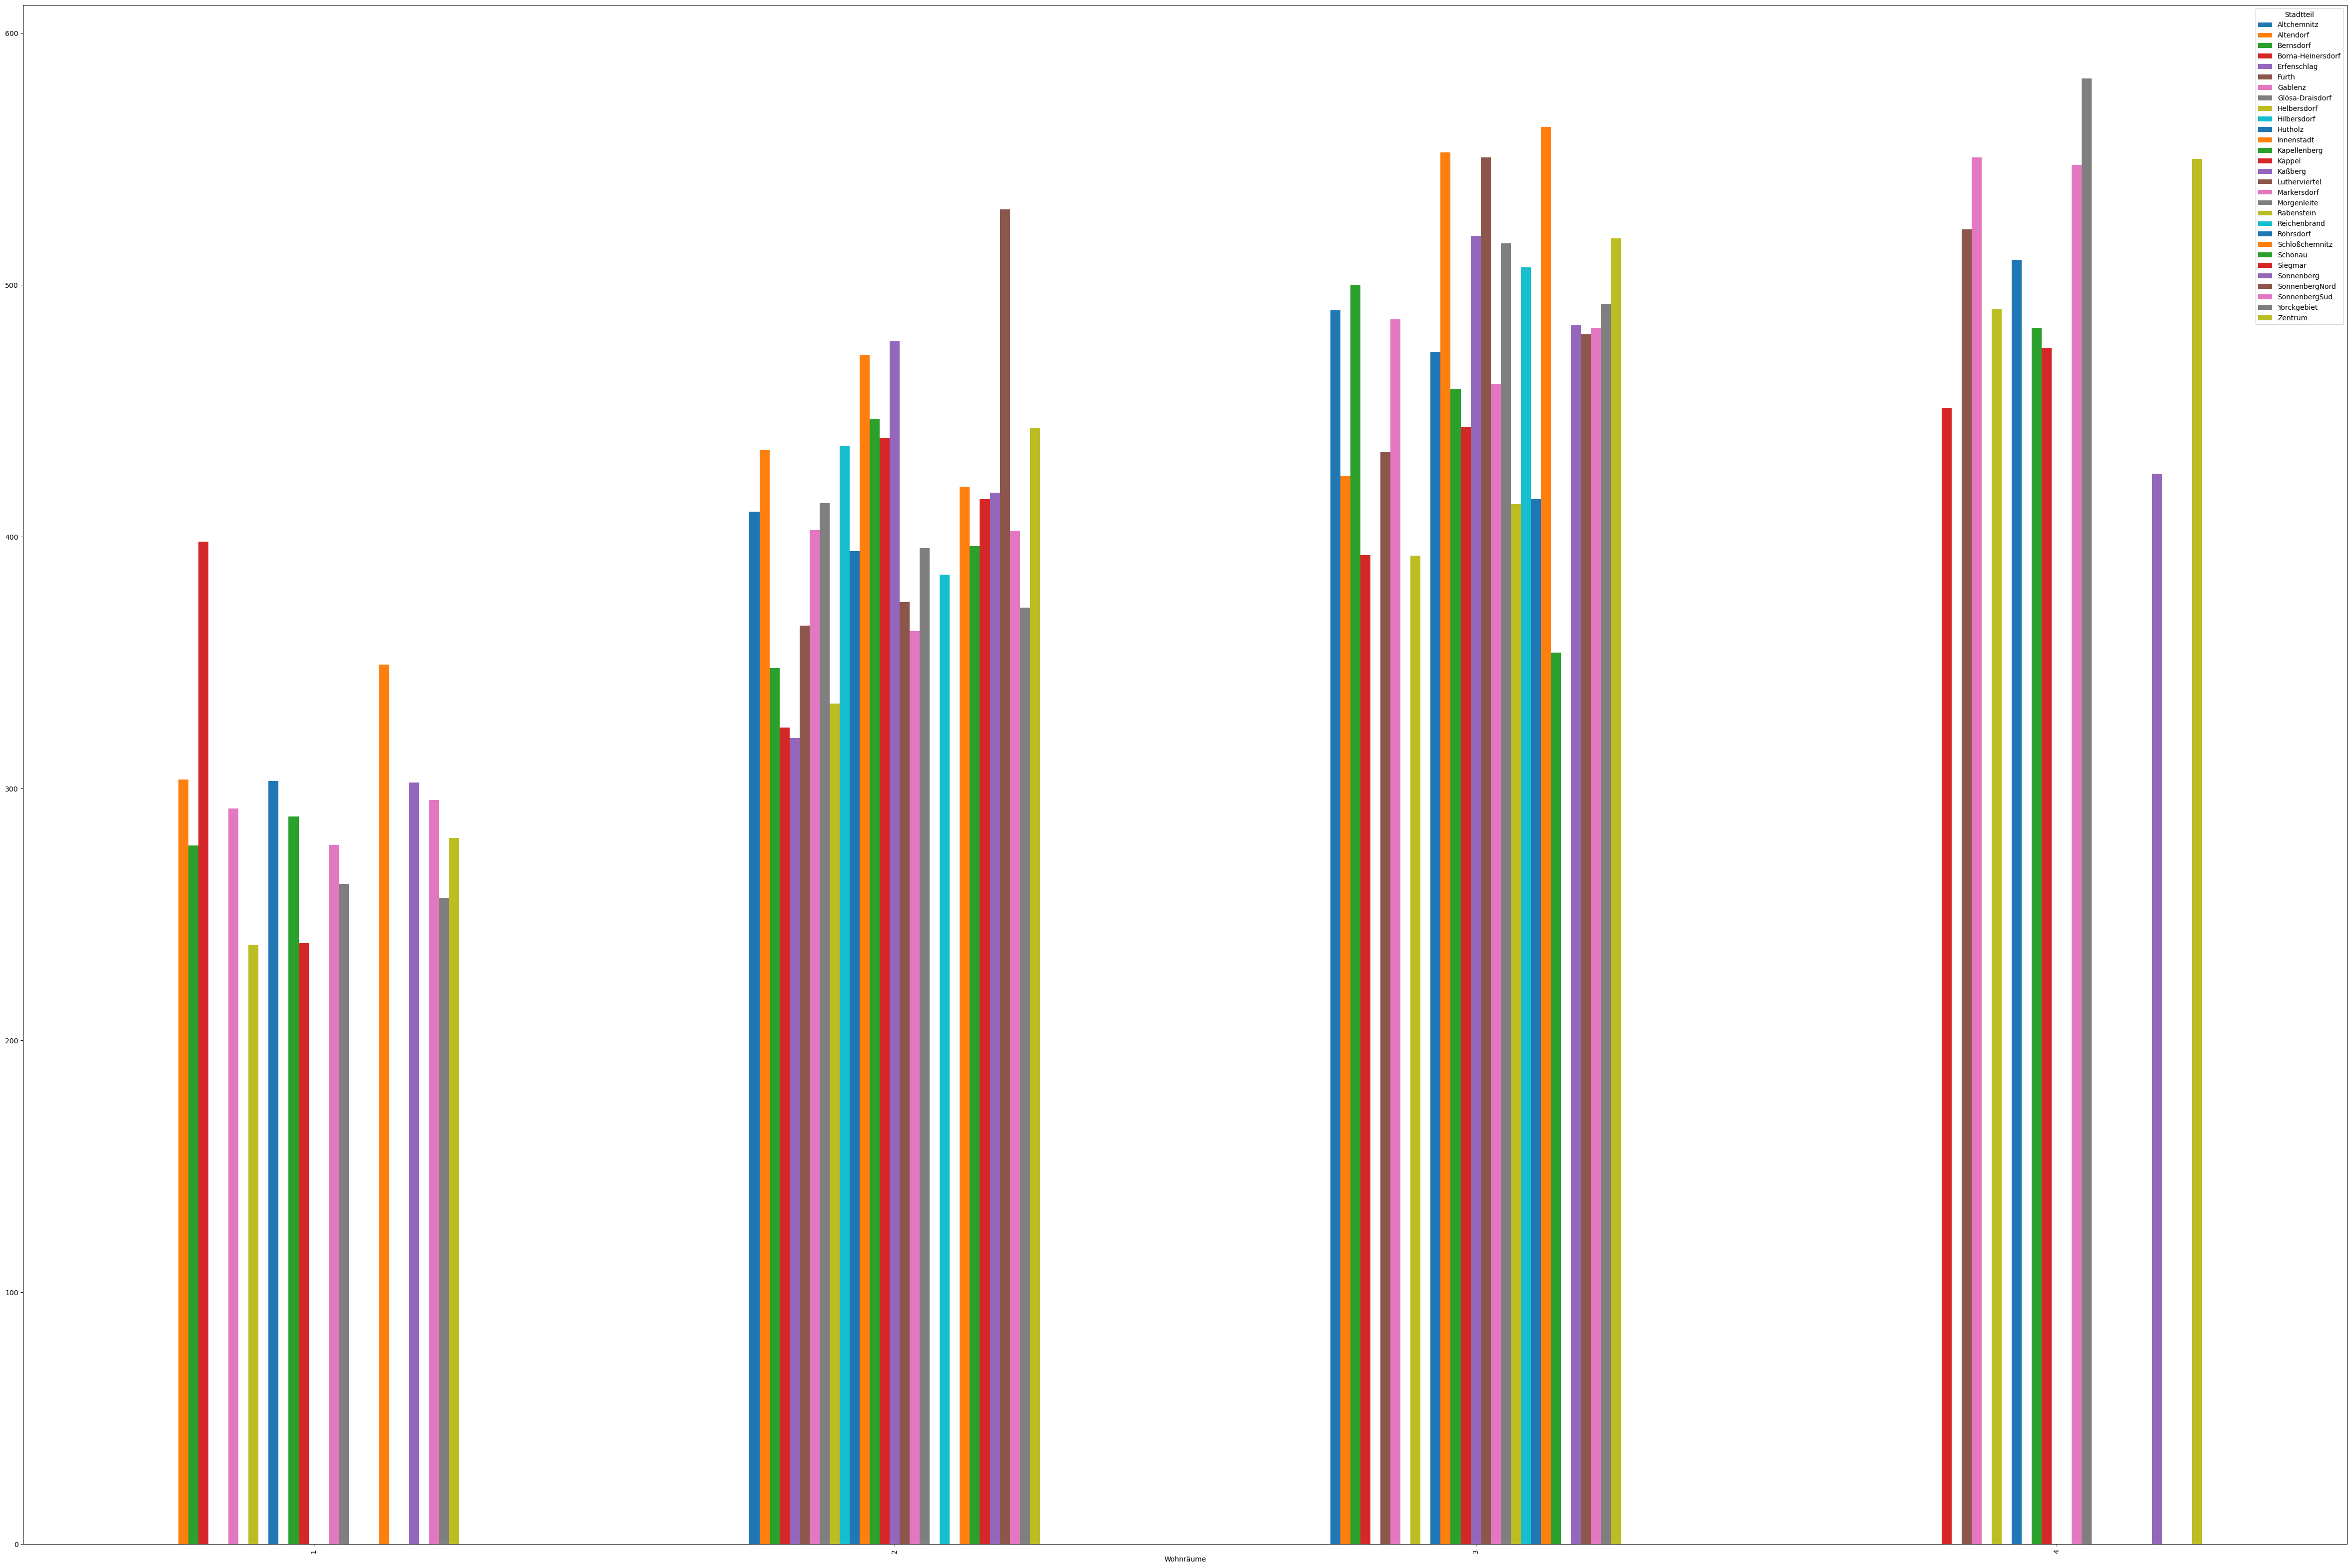

In [108]:
#fig,axes=
#fig = plt.figure()
 
#fig.set_figheight(20)
#fig.set_figwidth(40)
#df_combined.groupby(['Stadtteil','Wohnräume'])['Stadtteil'].count().plot.bar()

df_combined.pivot_table(index='Wohnräume',columns='Stadtteil',values='Gesamtmiete',aggfunc='mean').plot(kind='bar',figsize=(60,40))
plt.savefig("Avg. Prices of individual kind of flats for different areas.png")

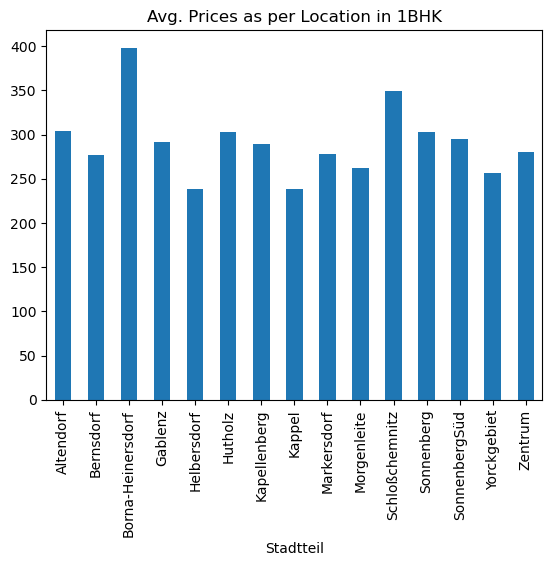

In [109]:
df_out_treat_1.groupby('Stadtteil')['Gesamtmiete'].mean().plot(kind='bar',title= 'Avg. Prices as per Location in 1BHK')
plt.savefig("Avg prices as per location in 1BHK.png")

**As it can be seen that Borna-Heinersdorf is having the highest rental value on an average whereas Helbrsdorfis having the least rental value**

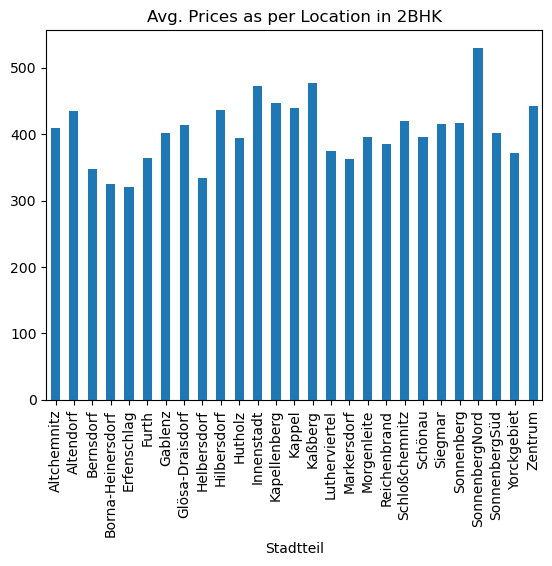

In [110]:
df_out_treat_2.groupby('Stadtteil')['Gesamtmiete'].mean().plot(kind='bar',title= 'Avg. Prices as per Location in 2BHK')
plt.savefig("Avg prices as per location in 2BHK.png")

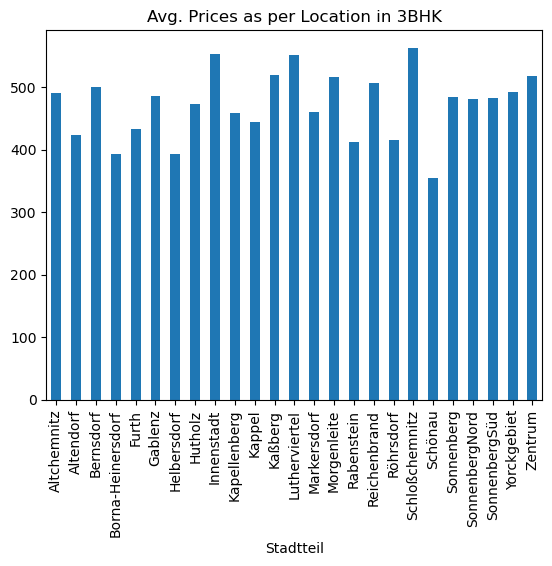

In [111]:
df_out_treat_3.groupby('Stadtteil')['Gesamtmiete'].mean().plot(kind='bar',title= 'Avg. Prices as per Location in 3BHK')
plt.savefig("Avg prices as per location in 3BHK.png")

In [112]:
df_combined.groupby(['Stadtteil','Wohnräume'])['Gesamtmiete'].mean()

Stadtteil          Wohnräume
Altchemnitz        2            410.000000
                   3            489.888889
Altendorf          1            303.583333
                   2            434.333333
                   3            424.250000
Bernsdorf          1            277.333333
                   2            347.833333
                   3            500.000000
Borna-Heinersdorf  1            398.000000
                   2            324.333333
                   3            392.666667
                   4            451.000000
Erfenschlag        2            320.000000
Furth              2            364.666667
                   3            433.625000
                   4            522.000000
Gablenz            1            292.000000
                   2            402.538462
                   3            486.312500
                   4            550.750000
Glösa-Draisdorf    2            413.333333
Helbersdorf        1            238.000000
                   2     

In [113]:
#x=df_out_treat_1.sort_values(by=['Gesamtmiete','Wohnräume'])
#m=x.agg({'Gesamtmiete':['min','max']})
#y=x.index[x['Gesamtmiete']==199.0].tolist()
#df.iloc[929,1]


**Which place has min and max rental value fr 1bhk**

In [114]:
print("The min and max prices for 1BHK is ",df_out_treat_1.agg({'Gesamtmiete':['min','max']}))
print("The index position for the min value",df_out_treat_1.index[df_out_treat_1['Gesamtmiete']==199.0].tolist())
print("The index position for the max value",df_out_treat_1.index[df_out_treat_1['Gesamtmiete']==368.0].tolist())
print("The highest rental price for 1BHK is located at ",df_out_treat.loc[394,'Stadtteil'])
print("The lowest rental price for 1BHK is located at ",df_out_treat.loc[929,'Stadtteil'])

The min and max prices for 1BHK is       Gesamtmiete
min        199.0
max        408.0
The index position for the min value [929]
The index position for the max value [394]
The highest rental price for 1BHK is located at  Hutholz
The lowest rental price for 1BHK is located at  Yorckgebiet


**Which place has min and max rental value fr 2bhk**

In [115]:
print("The min and max prices for 1BHK is ",df_out_treat_2.agg({'Gesamtmiete':['min','max']}))
print("The index position for the min value",df_out_treat_2.index[df_out_treat_2['Gesamtmiete']==289.0].tolist())
print("The index position for the max value",df_out_treat_2.index[df_out_treat_2['Gesamtmiete']==615.0].tolist())
print("The lowest rental price for 2BHK is located at ",df_out_treat.loc[289,'Stadtteil'])
print("The highest rental price for 2BHK is located at ",df_out_treat.loc[615,'Stadtteil'])

The min and max prices for 1BHK is       Gesamtmiete
min        289.0
max        615.0
The index position for the min value [282]
The index position for the max value [555]
The lowest rental price for 2BHK is located at  Helbersdorf
The highest rental price for 2BHK is located at  Markersdorf


**Which place has min and max rental value fr 3bhk**

In [116]:
print("The min and max prices for 1BHK is ",df_out_treat_3.agg({'Gesamtmiete':['min','max']}))
print("The index position for the min value",df_out_treat_3.index[df_out_treat_3['Gesamtmiete']==295.0].tolist())
print("The index position for the max value",df_out_treat_3.index[df_out_treat_3['Gesamtmiete']==683.0].tolist())
print("The lowest rental price for 2BHK is located at ",df_out_treat.loc[139,'Stadtteil'])
print("The highest rental price for 2BHK is located at ",df_out_treat.loc[619,'Stadtteil'])

The min and max prices for 1BHK is       Gesamtmiete
min        295.0
max        683.0
The index position for the min value [134]
The index position for the max value [619]
The lowest rental price for 2BHK is located at  Bernsdorf
The highest rental price for 2BHK is located at  Markersdorf


**Influence of each categorical feature on price**

The average price of flats for (No/Yes) Einbauküche
0    423.952275
1    446.621951
Name: Gesamtmiete, dtype: float64


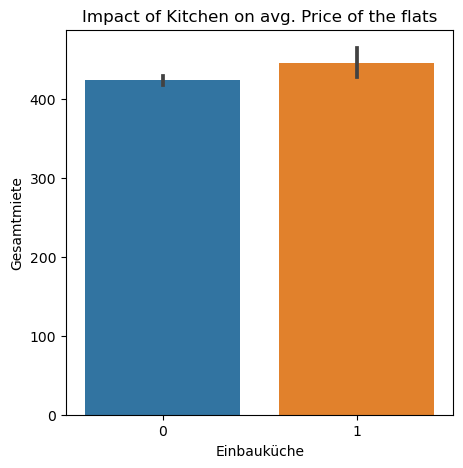

In [117]:
# Einbauküche- We can see that average price of flats with fitted kitchen have an edge over flats without fitted kitchen

fig = plt.figure() 
fig.set_figheight(5)
fig.set_figwidth(5)
print("The average price of flats for (No/Yes)",df_combined.groupby(['Einbauküche'])['Gesamtmiete'].mean())
sns.barplot(data=df_combined,x='Einbauküche',y='Gesamtmiete').set(title="Impact of Kitchen on avg. Price of the flats")
plt.savefig("Impact of Kitchen on avg. Price of the flats.png")
#sns.set(title="Impact of Kitchen on avg. Price of the flats")

The average price of flats for (No/Yes) Balkone
0    407.539062
1    432.288858
Name: Gesamtmiete, dtype: float64


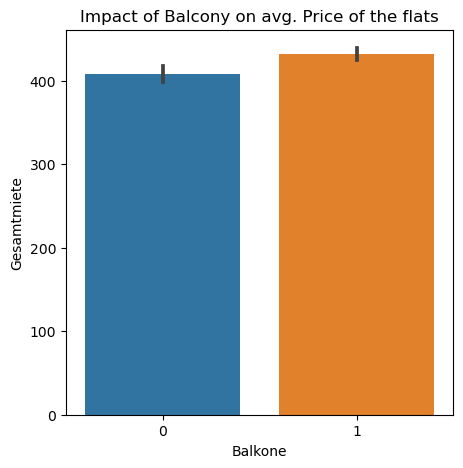

In [118]:
# Balkone- We can see that average price of flats with Balkone have an edge over flats without Balkone

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(5)
print("The average price of flats for (No/Yes)",df_combined.groupby(['Balkone'])['Gesamtmiete'].mean())
sns.barplot(data=df_combined,x='Balkone',y='Gesamtmiete').set(title="Impact of Balcony on avg. Price of the flats")
plt.savefig("Impact of Balcony on avg. Price of the flats.png")

The average price of flats for (No/Yes) Dachboden
0    419.396614
1    460.019231
Name: Gesamtmiete, dtype: float64


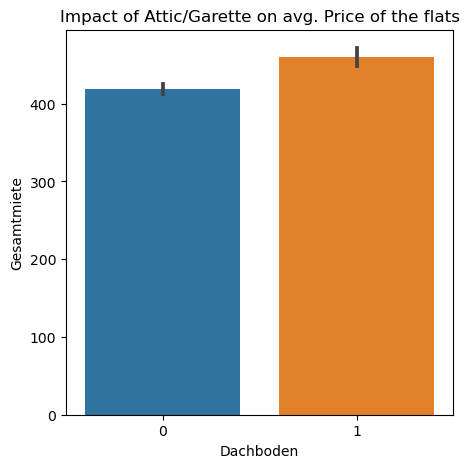

In [119]:
# Dachboden- We can see that average price of flats with Attic have an edge over flats without Attic
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(5)
print("The average price of flats for (No/Yes)",df_combined.groupby(['Dachboden'])['Gesamtmiete'].mean())
sns.barplot(data=df_combined,x='Dachboden',y='Gesamtmiete').set(title="Impact of Attic/Garette on avg. Price of the flats")
plt.savefig("Impact of Attic on avg. Price of the flats.png")

The average price of flats for (No/Yes) Spielplatz
0    420.743551
1    436.216049
Name: Gesamtmiete, dtype: float64


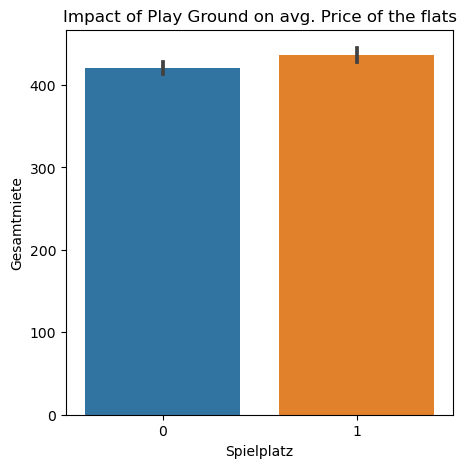

In [120]:
# Spielplatz- The average price of the Apartments with play ground is 16 Euros more than that of without
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(5)
print("The average price of flats for (No/Yes)",df_combined.groupby(['Spielplatz'])['Gesamtmiete'].mean())
sns.barplot(data=df_combined,x='Spielplatz',y='Gesamtmiete').set(title="Impact of Play Ground on avg. Price of the flats")
plt.savefig("Impact of Play Ground on avg. Price of the flats.png")

The average price of flats for (No/Yes) Handtuchtrockner
0    422.695205
1    451.616822
Name: Gesamtmiete, dtype: float64


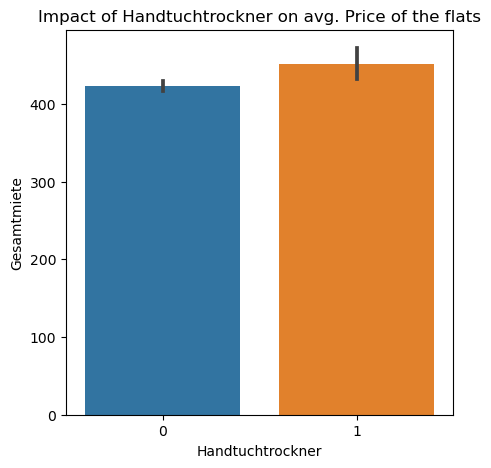

In [121]:
# Flats having Handtuchtrockner have good advantage over flats which dint have
fig = plt.figure() 
fig.set_figheight(5)
fig.set_figwidth(5)
print("The average price of flats for (No/Yes)",df_combined.groupby(['Handtuchtrockner'])['Gesamtmiete'].mean())
sns.barplot(x='Handtuchtrockner',y='Gesamtmiete',data=df_combined).set(title="Impact of Handtuchtrockner on avg. Price of the flats")
plt.savefig("Impact of Handtuchtrockener on avg. Price of the flats.png")

The average price of flats for (No/Yes) Aufzug
0    428.174455
1    421.454545
Name: Gesamtmiete, dtype: float64


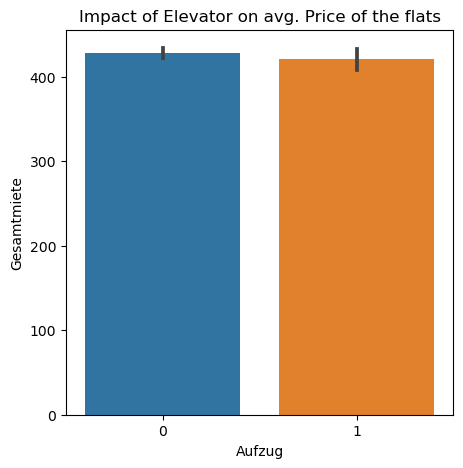

In [122]:
# Flats having Aufzug-Lift have no advantage over flats which dint have
fig = plt.figure() 
fig.set_figheight(5)
fig.set_figwidth(5)
print("The average price of flats for (No/Yes)",df_combined.groupby(['Aufzug'])['Gesamtmiete'].mean())
sns.barplot(x='Aufzug',y='Gesamtmiete',data=df_combined).set(title="Impact of Elevator on avg. Price of the flats")
plt.savefig("Impact of Elevator on avg. Price of the flats.png")

The average price of flats for (No/Yes) Fahrradraum
0    423.920993
1    443.402062
Name: Gesamtmiete, dtype: float64


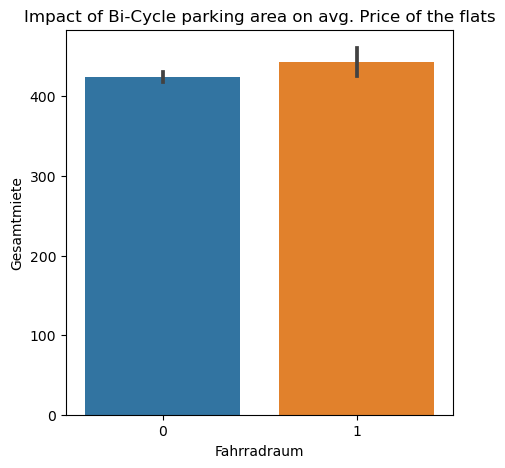

In [123]:
# Flats having Fahradraum-Bicycle Parking have advantage over flats which dint have
fig = plt.figure() 
fig.set_figheight(5)
fig.set_figwidth(5)
print("The average price of flats for (No/Yes)",df_combined.groupby(['Fahrradraum'])['Gesamtmiete'].mean())
sns.barplot(x='Fahrradraum',y='Gesamtmiete',data=df_combined).set(title="Impact of Bi-Cycle parking area on avg. Price of the flats")
plt.savefig("Impact of Bi-Cycle on avg. Price of the flats.png")

The average price of flats for (No/Yes) Keller
0    436.500000
1    425.076336
Name: Gesamtmiete, dtype: float64


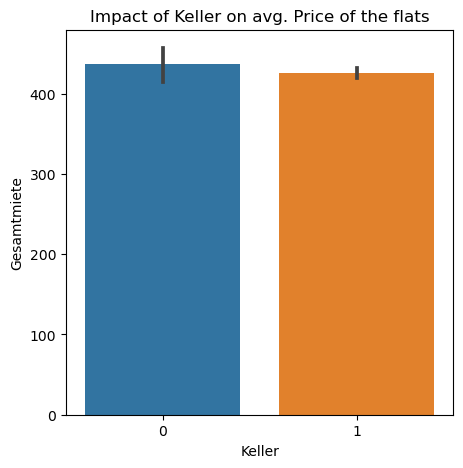

In [124]:
# Flats having Keller-Storage room in cellar have no advantage over flats which dint have
fig = plt.figure() 
fig.set_figheight(5)
fig.set_figwidth(5)
print("The average price of flats for (No/Yes)",df_combined.groupby(['Keller'])['Gesamtmiete'].mean())
sns.barplot(x='Keller',y='Gesamtmiete',data=df_combined).set(title="Impact of Keller on avg. Price of the flats")
plt.savefig("Impact of Keller on avg. Price of the flats.png")

In [125]:
df_combined.columns

Index(['City', 'Stadtteil', 'Straße', 'Wohnfläche ca.', 'Wohnräume',
       'Geschoss', 'Balkone', 'Age of Building', 'Distance', 'Einbauküche',
       'Aufzug', 'Fahrradraum', 'Trockenraum', 'Spielplatz', 'Abstellraum',
       'Dachboden', 'Handtuchtrockner', 'Keller', 'Wanne/Dusche',
       'Gesamtmiete'],
      dtype='object')

In [126]:
#df_combined.groupby(['Wohnräume','Balkone']).agg({'Cost per m2':[np.mean,max]})

In [127]:
#dtype_cat='int'

In [128]:
#dtype_cat='int'
#df_combined=df_combined.astype({'Wohnräume':'int','Geschoss':dtype_cat,'Balkone':dtype_cat,'Age of Building':'int','Einbauküche':dtype_cat,'Aufzug':dtype_cat,'Fahrradraum':dtype_cat,'Trockenraum':dtype_cat,'Spielplatz':dtype_cat,'Abstellraum':dtype_cat,'Dachboden':dtype_cat,'Handtuchtrockner':dtype_cat,'Keller':dtype_cat,'Wanne/Dusche':'string'})

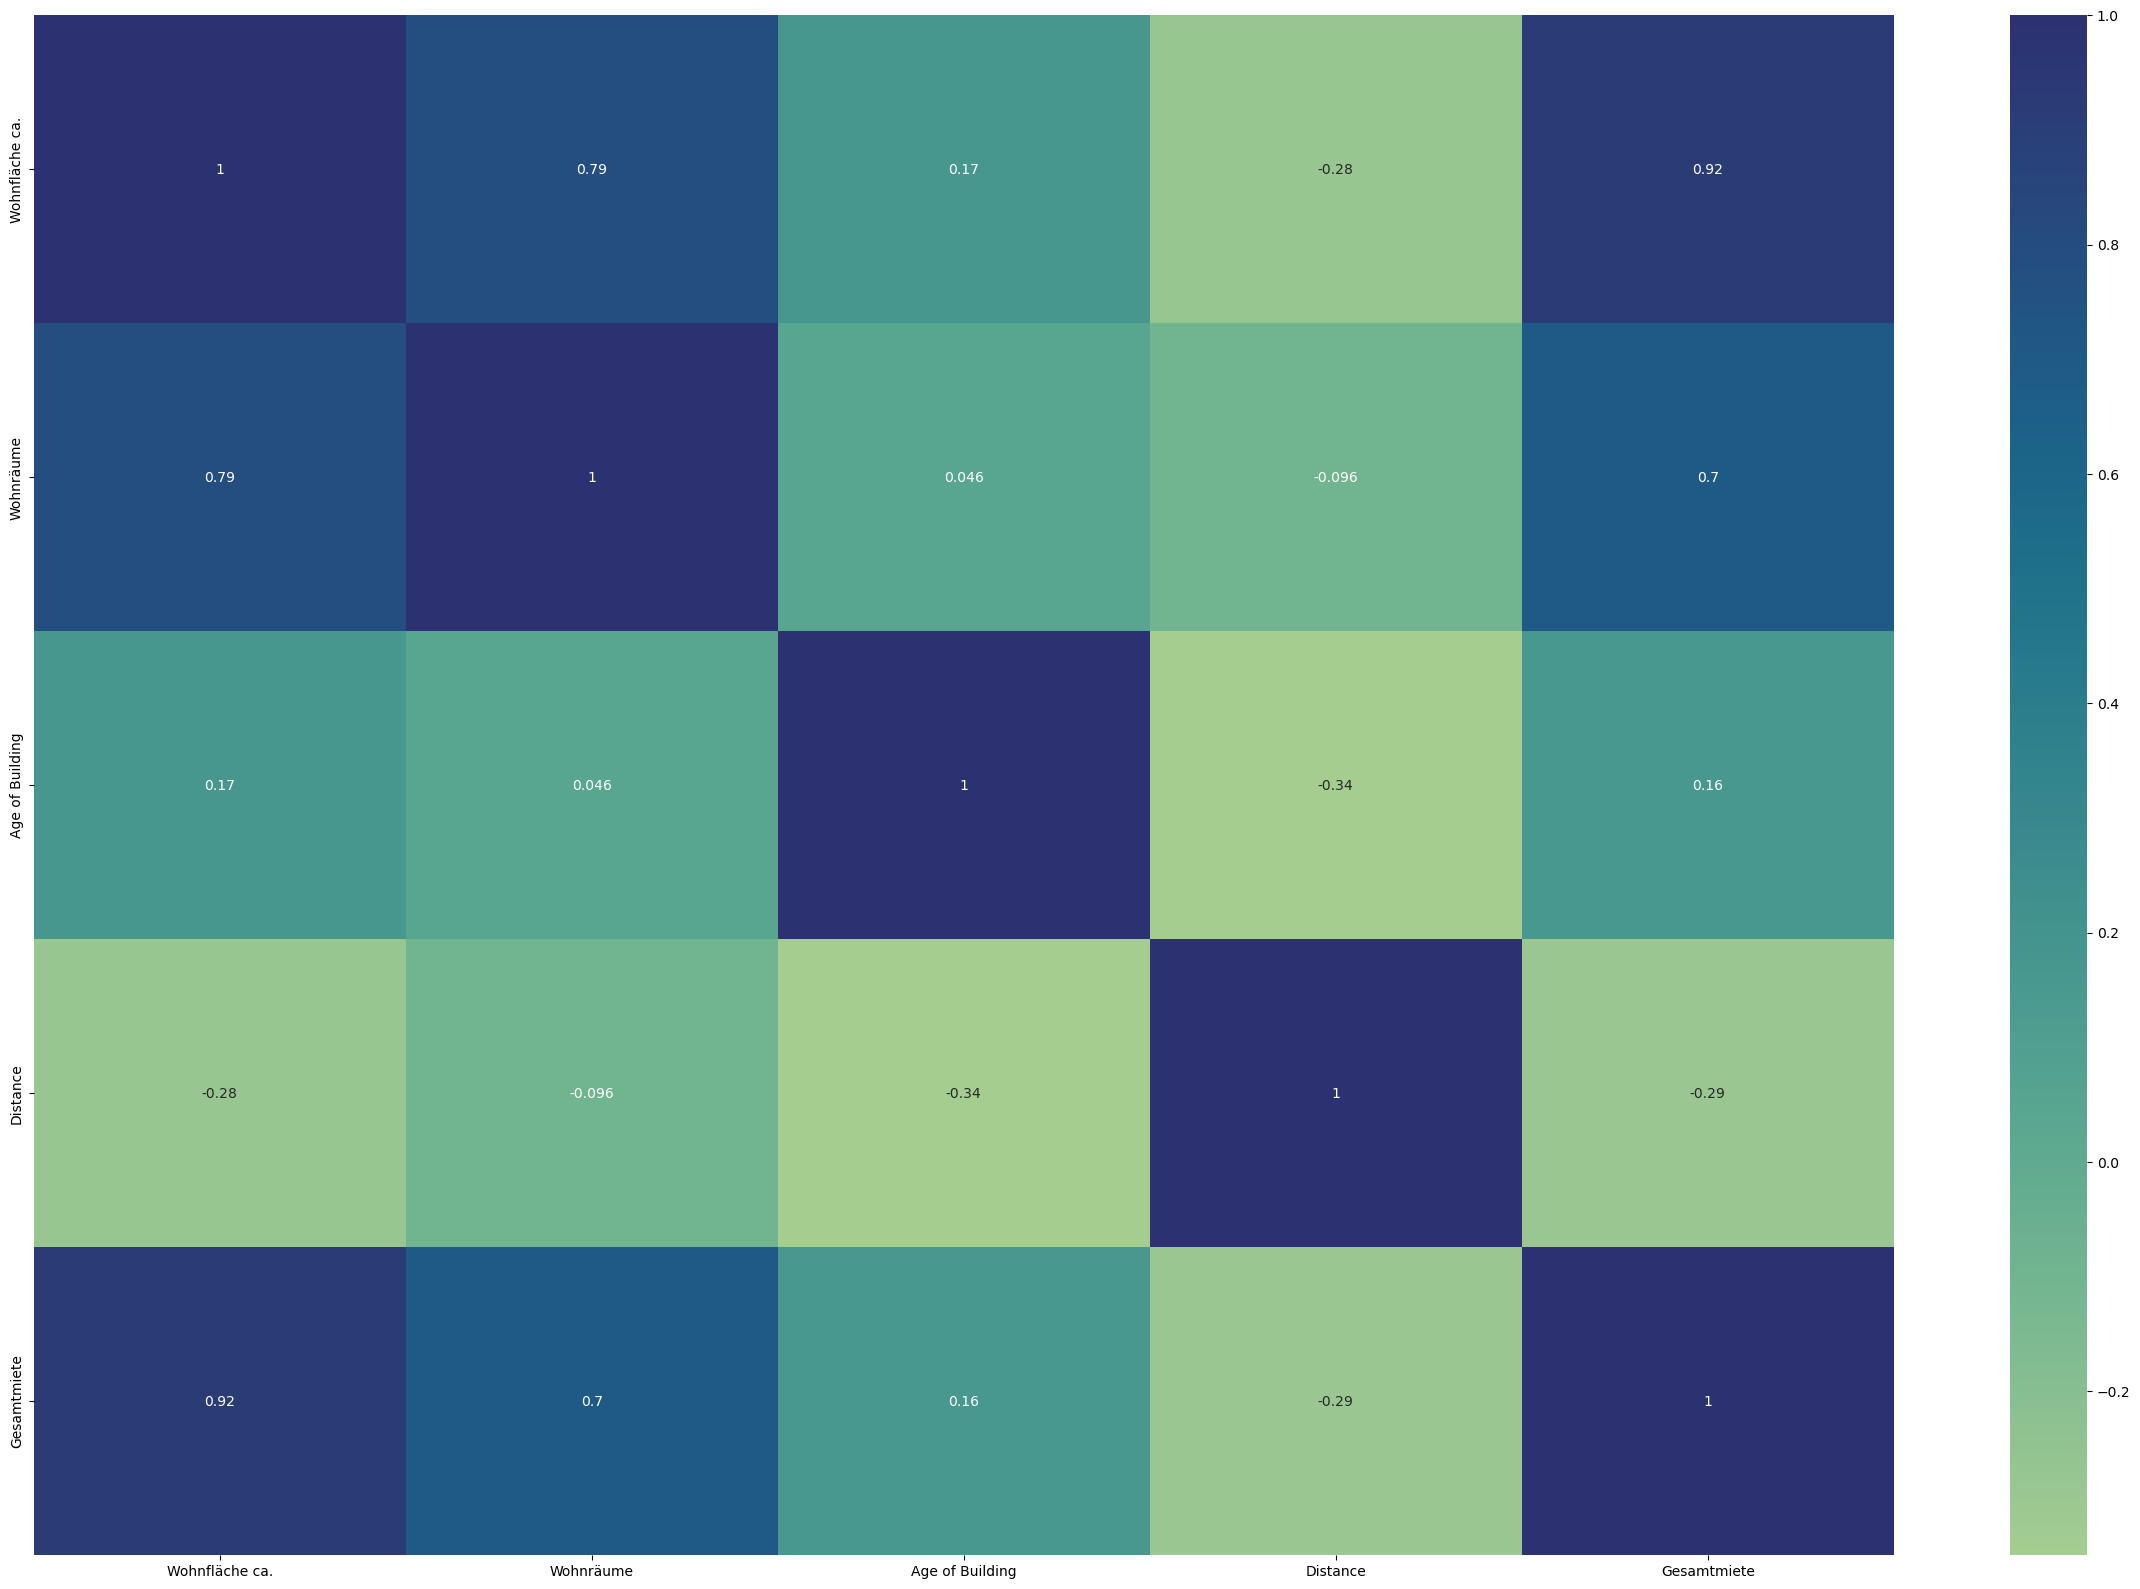

In [129]:
fig = plt.figure() 
fig.set_figheight(20)
fig.set_figwidth(30)
sns.heatmap(df_combined.corr(),annot=True,cmap="crest")
plt.savefig("Heatmap.png")

<Figure size 3000x2000 with 0 Axes>

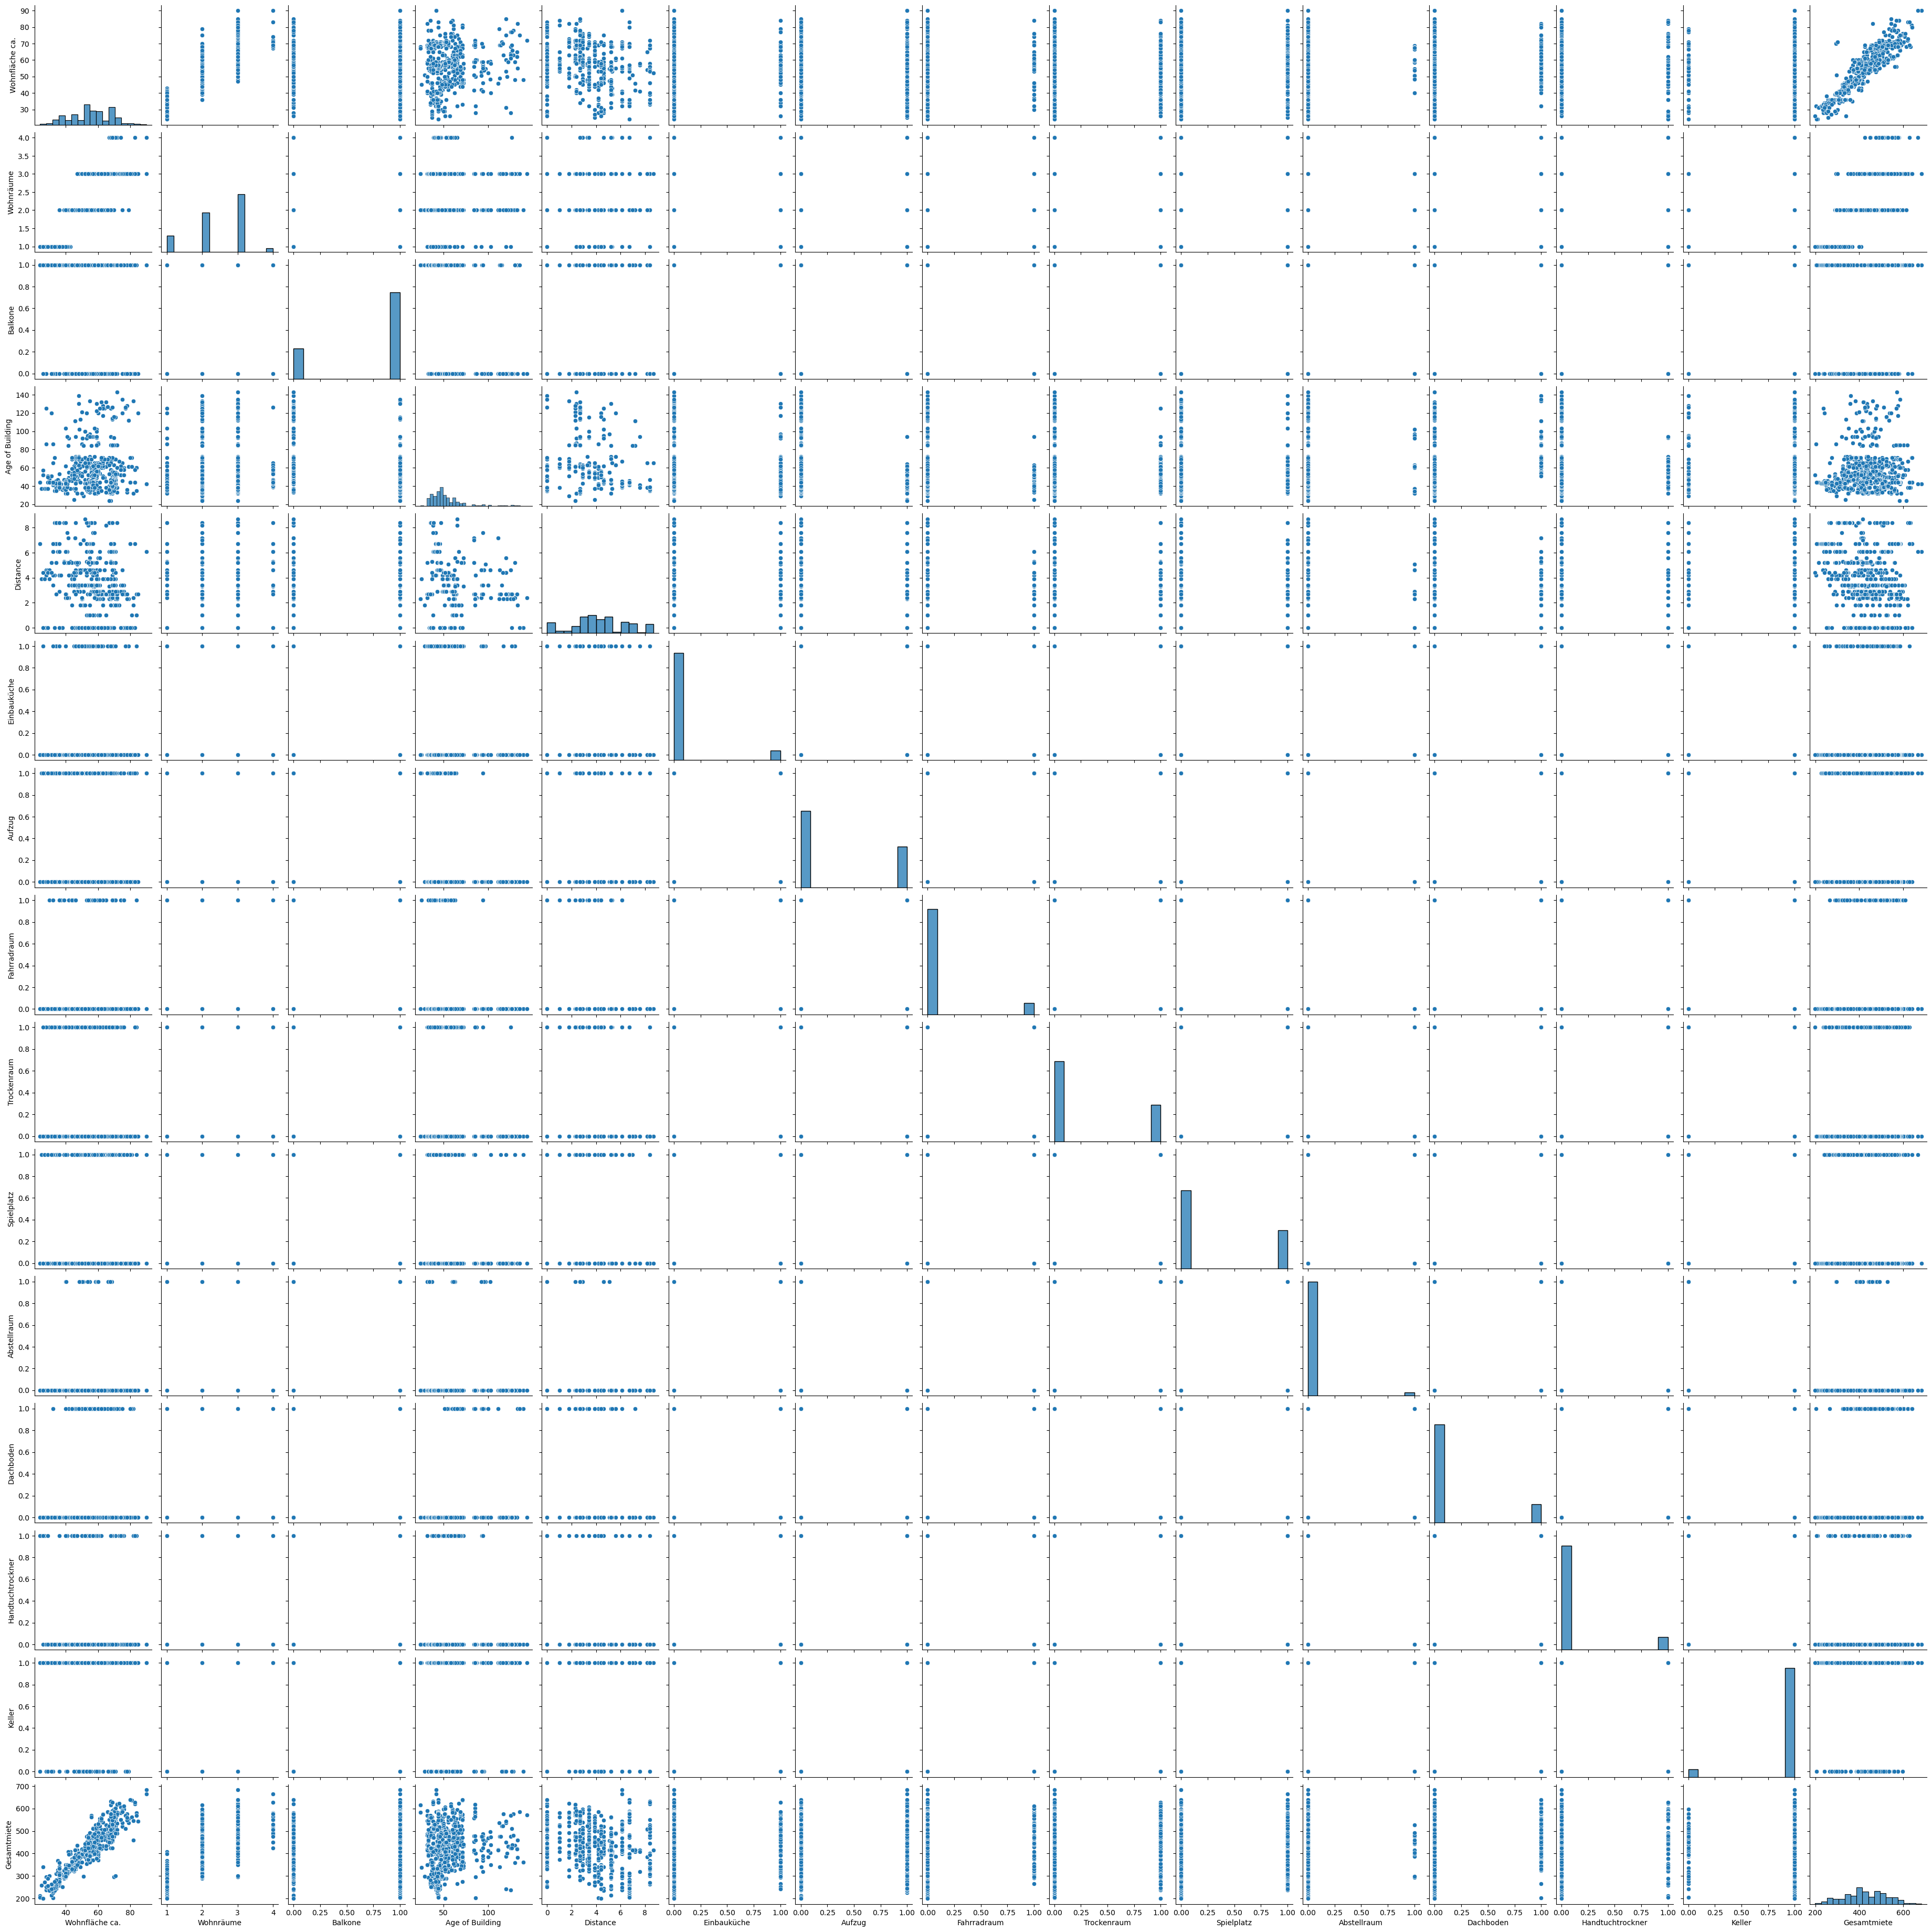

In [130]:
fig = plt.figure() 
fig.set_figheight(20)
fig.set_figwidth(30)
sns.pairplot(df_combined)
plt.savefig("pairplot.png")

In [131]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              983 non-null    object 
 1   Stadtteil         983 non-null    object 
 2   Straße            983 non-null    object 
 3   Wohnfläche ca.    983 non-null    float64
 4   Wohnräume         983 non-null    int32  
 5   Geschoss          983 non-null    object 
 6   Balkone           983 non-null    object 
 7   Age of Building   983 non-null    int32  
 8   Distance          983 non-null    float64
 9   Einbauküche       983 non-null    object 
 10  Aufzug            983 non-null    object 
 11  Fahrradraum       983 non-null    object 
 12  Trockenraum       983 non-null    object 
 13  Spielplatz        983 non-null    object 
 14  Abstellraum       983 non-null    object 
 15  Dachboden         983 non-null    object 
 16  Handtuchtrockner  983 non-null    object 
 1

In [132]:
df_combined.drop(['City','Straße'],axis=1,inplace=True)

In [133]:
df_combined.loc[(df_combined['Wanne/Dusche']=="Wanne"),'Wanne/Dusche'] = '1'
df_combined.loc[(df_combined['Wanne/Dusche']=="Dusche"),'Wanne/Dusche'] = '0'
df_combined.loc[(df_combined['Wanne/Dusche']==''),'Wanne/Dusche'] = '0'

In [134]:
dtype_cat='int'
df_combined=df_combined.astype({'Wohnfläche ca.':'int','Distance':'int','Wohnräume':'int','Geschoss':dtype_cat,'Balkone':dtype_cat,'Age of Building':'int','Einbauküche':dtype_cat,'Aufzug':dtype_cat,'Fahrradraum':dtype_cat,'Trockenraum':dtype_cat,'Spielplatz':dtype_cat,'Abstellraum':dtype_cat,'Dachboden':dtype_cat,'Handtuchtrockner':dtype_cat,'Keller':dtype_cat,'Wanne/Dusche':dtype_cat})

In [135]:
df_combined['Wanne/Dusche'].value_counts()

1    773
0    210
Name: Wanne/Dusche, dtype: int64

In [136]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stadtteil         983 non-null    object 
 1   Wohnfläche ca.    983 non-null    int32  
 2   Wohnräume         983 non-null    int32  
 3   Geschoss          983 non-null    int32  
 4   Balkone           983 non-null    int32  
 5   Age of Building   983 non-null    int32  
 6   Distance          983 non-null    int32  
 7   Einbauküche       983 non-null    int32  
 8   Aufzug            983 non-null    int32  
 9   Fahrradraum       983 non-null    int32  
 10  Trockenraum       983 non-null    int32  
 11  Spielplatz        983 non-null    int32  
 12  Abstellraum       983 non-null    int32  
 13  Dachboden         983 non-null    int32  
 14  Handtuchtrockner  983 non-null    int32  
 15  Keller            983 non-null    int32  
 16  Wanne/Dusche      983 non-null    int32  
 1

In [137]:
#Convert into dummies
df_combined_dummies=pd.get_dummies(df_combined['Stadtteil'], drop_first=True)

In [138]:
df_combined_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Altendorf          983 non-null    uint8
 1   Bernsdorf          983 non-null    uint8
 2   Borna-Heinersdorf  983 non-null    uint8
 3   Erfenschlag        983 non-null    uint8
 4   Furth              983 non-null    uint8
 5   Gablenz            983 non-null    uint8
 6   Glösa-Draisdorf    983 non-null    uint8
 7   Helbersdorf        983 non-null    uint8
 8   Hilbersdorf        983 non-null    uint8
 9   Hutholz            983 non-null    uint8
 10  Innenstadt         983 non-null    uint8
 11  Kapellenberg       983 non-null    uint8
 12  Kappel             983 non-null    uint8
 13  Kaßberg            983 non-null    uint8
 14  Lutherviertel      983 non-null    uint8
 15  Markersdorf        983 non-null    uint8
 16  Morgenleite        983 non-null    uint8
 17  Rabenstein      

In [139]:
df_combined=pd.concat([df_combined,df_combined_dummies],axis=1)

In [140]:
df_combined

,Stadtteil,Wohnfläche ca.,Wohnräume,Geschoss,Balkone,Age of Building,Distance,Einbauküche,Aufzug,Fahrradraum,...,Reichenbrand,Röhrsdorf,Schloßchemnitz,Schönau,Siegmar,Sonnenberg,SonnenbergNord,SonnenbergSüd,Yorckgebiet,Zentrum
0,SonnenbergSüd,39,1,4,1,33,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,SonnenbergSüd,40,1,5,1,37,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Altendorf,36,1,5,1,40,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Altendorf,36,1,3,1,38,4,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Altendorf,36,1,4,1,38,4,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,Altendorf,36,1,5,1,38,4,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,Altendorf,36,1,9,1,42,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,Altendorf,36,1,0,1,42,4,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8,Altendorf,36,1,1,1,42,4,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9,Altendorf,37,1,5,1,42,4,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [141]:
df_combined.drop(['Stadtteil'],axis=1,inplace=True)

In [142]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Wohnfläche ca.     983 non-null    int32  
 1   Wohnräume          983 non-null    int32  
 2   Geschoss           983 non-null    int32  
 3   Balkone            983 non-null    int32  
 4   Age of Building    983 non-null    int32  
 5   Distance           983 non-null    int32  
 6   Einbauküche        983 non-null    int32  
 7   Aufzug             983 non-null    int32  
 8   Fahrradraum        983 non-null    int32  
 9   Trockenraum        983 non-null    int32  
 10  Spielplatz         983 non-null    int32  
 11  Abstellraum        983 non-null    int32  
 12  Dachboden          983 non-null    int32  
 13  Handtuchtrockner   983 non-null    int32  
 14  Keller             983 non-null    int32  
 15  Wanne/Dusche       983 non-null    int32  
 16  Gesamtmiete        983 non

In [143]:
# Let's check multicollinearity 
# Acceptable VIF range is <10
Default_indep=df_combined

import statsmodels.api as sm
features=list(Default_indep.columns)
for i in range(1, len(Default_indep.columns)):
    x=Default_indep.loc[:,Default_indep.columns!=features[i]]
    y=Default_indep.loc[:,Default_indep.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print ("R-Sqr value of {} is {}".format(features[i],rsq))
    print ('VIF for {} is {}'.format(features[i],vif))

R-Sqr value of Wohnräume is 0.7750839229536475
VIF for Wohnräume is 4.45
R-Sqr value of Geschoss is 0.16677452600540166
VIF for Geschoss is 1.2
R-Sqr value of Balkone is 0.39785139690620397
VIF for Balkone is 1.66
R-Sqr value of Age of Building is 0.49260217617905777
VIF for Age of Building is 1.97
R-Sqr value of Distance is 0.9932296843833848
VIF for Distance is 147.7
R-Sqr value of Einbauküche is 0.14849326003311425
VIF for Einbauküche is 1.17
R-Sqr value of Aufzug is 0.5476450592973046
VIF for Aufzug is 2.21
R-Sqr value of Fahrradraum is 0.39101866229075144
VIF for Fahrradraum is 1.64
R-Sqr value of Trockenraum is 0.34083228218936956
VIF for Trockenraum is 1.52
R-Sqr value of Spielplatz is 0.3201833715581829
VIF for Spielplatz is 1.47
R-Sqr value of Abstellraum is 0.5018276896147842
VIF for Abstellraum is 2.01
R-Sqr value of Dachboden is 0.4771374782858666
VIF for Dachboden is 1.91
R-Sqr value of Handtuchtrockner is 0.3700225754743187
VIF for Handtuchtrockner is 1.59
R-Sqr value of 

In [144]:
from sklearn.model_selection import train_test_split
y=df_combined['Gesamtmiete']
df_combined_x=df_combined.drop(['Gesamtmiete'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(df_combined_x,y,test_size=0.25, random_state=1)

Model Building and Evaluation

In [145]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regr=linear_model.LinearRegression()
#Train the data
regr.fit(x_train,y_train)

LinearRegression()

In [154]:
#Prediction
y_train_pred=regr.predict(x_train)
y_train_pred

array([555.85332372, 289.90144595, 452.64439317, 317.50739536,
       566.42918819, 417.04363884, 551.88497596, 524.60598712,
       357.24241064, 489.12101987, 336.32954317, 223.7977794 ,
       479.34400394, 387.16704212, 542.33264938, 360.72162925,
       409.11939963, 287.56885092, 521.43070215, 266.00694333,
       453.05640735, 253.3437209 , 357.23995706, 524.69831027,
       399.00641132, 339.69225987, 495.76814535, 459.68544105,
       307.43862333, 494.72165752, 279.89340454, 371.91756845,
       552.92066417, 280.6972477 , 423.14437621, 305.02441227,
       554.2001836 , 514.75173967, 478.03743704, 332.93554272,
       445.49894898, 593.13947892, 511.86487849, 475.48964089,
       410.09964146, 306.02448651, 402.23259525, 491.57323499,
       451.55652531, 415.        , 431.51304334, 413.4293904 ,
       429.32179133, 535.0177832 , 411.41910785, 273.14353247,
       471.37278289, 509.2918106 , 352.64124167, 254.66961461,
       549.09273501, 552.77624713, 522.17217124, 378.26

In [147]:

print(regr.coef_)

[ 7.17391973e+00 -1.57611697e+00 -7.97301310e-01  1.30632041e+01
 -4.19119490e-02  1.21694890e+00  1.19728603e+01  4.08321430e+00
 -7.81193487e+00  1.15748722e+00  3.42075685e+00  1.92262470e+01
  1.59613233e+01  1.86294144e+01 -1.43923972e+00 -1.02790040e+01
  9.88787694e+00 -1.51718702e+01 -1.28064493e+01 -3.21653871e+01
 -1.86189869e+00  3.52223471e+00  6.48544090e+01 -1.46344404e+01
  3.35020626e+01  1.32913284e+01  8.96452738e+00 -9.04487355e-01
  8.45822198e+00  3.55092212e+01  5.65482595e+00 -4.89462923e+00
  1.71322192e+00 -3.15316061e+01  1.13000573e+00  2.64760796e+01
  7.53234087e+00 -3.18940271e+00  1.84004987e+01 -2.86689479e+01
  3.52575392e+01 -4.44060843e+01 -1.01319367e+01  2.09564923e+01]


In [148]:
# Get all the coefficients for the features
Coef_df=pd.DataFrame(zip(x_train.columns,regr.coef_))
Coef_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,Wohnfläche ca.,Wohnräume,Geschoss,Balkone,Age of Building,Distance,Einbauküche,Aufzug,Fahrradraum,Trockenraum,...,Reichenbrand,Röhrsdorf,Schloßchemnitz,Schönau,Siegmar,Sonnenberg,SonnenbergNord,SonnenbergSüd,Yorckgebiet,Zentrum
1,7.17392,-1.576117,-0.797301,13.063204,-0.041912,1.216949,11.97286,4.083214,-7.811935,1.157487,...,1.130006,26.47608,7.532341,-3.189403,18.400499,-28.668948,35.257539,-44.406084,-10.131937,20.956492


In [149]:
# Get all the model performace parameters
# we can get train error
from sklearn import metrics

mean_l1_error_train=metrics.mean_absolute_error(y_train,y_train_pred)
mean_l2_error_train=metrics.mean_squared_error(y_train,y_train_pred)
Rootmean_l2_error_train=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))

train_accuracy = regr.score(x_train, y_train)
print("mean_l1_error_train is {} mean_l2_error_train is {} Rootmean_l2_error_train is {} and accuracy is {}".format(mean_l1_error_train,mean_l2_error_train,Rootmean_l2_error_train,train_accuracy))

mean_l1_error_train is 20.629359163772293 mean_l2_error_train is 835.9768156178104 Rootmean_l2_error_train is 28.913263662509813 and accuracy is 0.9074762966734004


In [166]:
# model parameters and annova
# By default the fit is through the origin (w/o intercept), to avoid that we add a constant
x_train_final=sm.add_constant(x_train)
model_object=sm.OLS(y_train,x_train_final)
model=model_object.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Gesamtmiete   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     158.1
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:34:30   Log-Likelihood:                -3525.2
No. Observations:                 737   AIC:                             7138.
Df Residuals:                     693   BIC:                             7341.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                22.4496     10.98

In [151]:
#When we reset the index, the old index is added as a column, and a new sequential index is used
#We can use the drop parameter to avoid the old index being added as a column
DF_y_train_pred=pd.DataFrame(y_train_pred,columns=['price_predict'])
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
DF_y_train_pred.reset_index(drop=True, inplace=True)

Train_with_pred=pd.concat([x_train,y_train,DF_y_train_pred], axis=1)
Train_with_pred

,Wohnfläche ca.,Wohnräume,Geschoss,Balkone,Age of Building,Distance,Einbauküche,Aufzug,Fahrradraum,Trockenraum,...,Schloßchemnitz,Schönau,Siegmar,Sonnenberg,SonnenbergNord,SonnenbergSüd,Yorckgebiet,Zentrum,Gesamtmiete,price_predict
0,74,3,4,1,52,3,0,1,1,1,...,0,0,0,0,0,0,0,0,607.0,555.853324
1,36,1,8,1,41,6,0,1,0,1,...,0,0,0,0,0,0,0,0,275.0,289.901446
2,53,2,1,1,65,3,0,0,0,0,...,0,0,0,0,0,0,0,0,418.0,452.644393
3,36,1,4,1,38,8,0,1,0,1,...,0,0,0,0,0,0,0,0,329.0,317.507395
4,71,3,0,1,52,3,0,1,1,1,...,0,0,0,0,0,0,0,0,577.0,566.429188
5,55,3,0,1,94,2,0,1,0,0,...,0,0,0,1,0,0,0,0,389.0,417.043639
6,78,3,3,1,33,2,0,0,0,0,...,0,0,0,1,0,0,0,0,547.0,551.884976
7,70,3,0,1,51,4,0,1,0,0,...,0,0,0,0,0,0,1,0,505.0,524.605987
8,41,1,5,1,32,2,0,1,0,0,...,1,0,0,0,0,0,0,0,350.0,357.242411
9,57,3,3,1,62,4,1,1,0,1,...,0,0,0,0,0,0,0,0,473.0,489.121020


In [152]:
# Get the model tested on test data

y_test_pred=regr.predict(x_test)

from sklearn import metrics

mean_l1_error_test=metrics.mean_absolute_error(y_test,y_test_pred)
mean_l2_error_test=metrics.mean_squared_error(y_test,y_test_pred)
Rootmean_l2_error_test=round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),10)

test_accuracy = regr.score(x_test, y_test)
print(pd.DataFrame(zip(x_test,y_test,y_test_pred)))
print("mean_l1_error_test is {} mean_l2_error_test is {} Rootmean_l2_error_test is {} and rmse_test is {}".format(mean_l1_error_test,mean_l2_error_test,Rootmean_l2_error_test,test_accuracy))

                    0      1           2
0      Wohnfläche ca.  393.0  410.049252
1           Wohnräume  373.0  385.701074
2            Geschoss  622.0  586.505992
3             Balkone  514.0  517.860620
4     Age of Building  466.0  439.607394
5            Distance  251.0  314.348926
6         Einbauküche  350.0  358.039712
7              Aufzug  502.0  498.141564
8         Fahrradraum  274.0  294.601430
9         Trockenraum  425.0  425.628974
10         Spielplatz  531.0  509.335608
11        Abstellraum  309.0  293.645503
12          Dachboden  562.0  517.171522
13   Handtuchtrockner  447.0  501.008190
14             Keller  490.0  470.575482
15       Wanne/Dusche  409.0  435.692989
16          Altendorf  392.0  390.716433
17          Bernsdorf  408.0  442.103827
18  Borna-Heinersdorf  483.0  436.842773
19        Erfenschlag  407.0  413.471302
20              Furth  297.0  408.843737
21            Gablenz  575.0  602.052148
22    Glösa-Draisdorf  353.0  362.596489
23        Helber

In [153]:
DF_y_test_pred=pd.DataFrame(y_test_pred,columns=['price_predict'])
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
DF_y_test_pred.reset_index(drop=True, inplace=True)

Test_with_pred=pd.concat([x_test,y_test,DF_y_test_pred], axis=1)
Test_with_pred

,Wohnfläche ca.,Wohnräume,Geschoss,Balkone,Age of Building,Distance,Einbauküche,Aufzug,Fahrradraum,Trockenraum,...,Schloßchemnitz,Schönau,Siegmar,Sonnenberg,SonnenbergNord,SonnenbergSüd,Yorckgebiet,Zentrum,Gesamtmiete,price_predict
0,53,3,3,0,36,8,0,0,0,0,...,0,0,0,0,0,0,0,0,393.0,410.049252
1,54,3,2,0,47,5,0,0,0,1,...,0,0,0,0,0,0,0,0,373.0,385.701074
2,73,3,2,1,67,1,0,0,0,0,...,0,0,0,0,0,0,0,0,622.0,586.505992
3,66,2,3,1,36,0,0,0,0,0,...,0,0,0,0,0,0,0,1,514.0,517.860620
4,60,3,0,0,59,2,0,1,1,1,...,0,0,0,0,0,0,0,0,466.0,439.607394
5,38,1,4,1,36,0,0,0,0,0,...,0,0,0,0,0,0,0,1,251.0,314.348926
6,41,1,4,1,32,2,0,1,0,0,...,1,0,0,0,0,0,0,0,350.0,358.039712
7,60,2,1,1,62,0,0,0,0,0,...,0,0,0,0,0,0,0,1,502.0,498.141564
8,36,1,2,1,43,6,0,1,0,1,...,0,0,0,0,0,0,0,0,274.0,294.601430
9,57,3,1,0,56,3,0,0,0,0,...,0,0,0,0,0,0,0,0,425.0,425.628974


## Now that we have used Linear regression to predict the prices. Let us use other regression models and compare it with the linear regression above

In [258]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


In [259]:
from sklearn.metrics import r2_score,mean_squared_error

In [260]:
def model_(model_name,model,xtrain,ytrain,xtest,ytest):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    r2=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    display=[model_name,rmse,r2]
    return display

In [247]:
LR=model_("Linear Regression",LinearRegression(),x_train,y_train,x_test,y_test)
SVR=model_("SVM",SVR(kernel='linear'),x_train,y_train,x_test,y_test)
LASR=model_("Lasso Regression",Lasso(),x_train,y_train,x_test,y_test)
RIDG=model_("Ridge Regression",Ridge(),x_train,y_train,x_test,y_test)
DT=model_("Decision Tree",DecisionTreeRegressor(),x_train,y_train,x_test,y_test)
KNN=model_("KNN",KNeighborsRegressor(),x_train,y_train,x_test,y_test)
RAF=model_("Random Forest",RandomForestRegressor(),x_train,y_train,x_test,y_test)
ADA=model_("Ada Boost Regressor",AdaBoostRegressor(),x_train,y_train,x_test,y_test)

In [249]:
df_models=pd.DataFrame([LR,SVR,LASR,RIDG,DT,KNN,RAF,ADA],columns=['Model Name', 'RMSE','R2'])

In [250]:
df_models.sort_values(by='R2',ascending=False)

,Model Name,RMSE,R2
6,Random Forest,27.263626,0.902266
5,KNN,28.392115,0.894008
3,Ridge Regression,30.146868,0.880501
1,SVM,30.255331,0.879640
0,Linear Regression,30.280221,0.879442
2,Lasso Regression,30.733768,0.875803
7,Ada Boost Regressor,35.261292,0.836516
4,Decision Tree,41.784253,0.770436


# K Fold Validation

In [261]:
from sklearn.model_selection import cross_val_score,GridSearchCV

In [266]:
def k_fold(df_combined_x,y,fold=5):
    
    lr_score = cross_val_score(LinearRegression(),df_combined_x,y,cv=fold)
    svr_score = cross_val_score(SVR(kernel='linear'),df_combined_x,y,cv=fold)
    lasso_score = cross_val_score(Lasso(),df_combined_x,y,cv=fold)
    ridge_score = cross_val_score(Ridge(),df_combined_x,y,cv=fold)
    DecisT_score = cross_val_score(DecisionTreeRegressor(),df_combined_x,y,cv=fold)
    knn_score = cross_val_score(KNeighborsRegressor(),df_combined_x,y,cv=fold)
    randfo_score = cross_val_score(RandomForestRegressor(),df_combined_x,y,cv=fold)
    Ada_score = cross_val_score(AdaBoostRegressor(),df_combined_x,y,cv=fold)
    scores=[lr_score,svr_score,lasso_score,ridge_score,DecisT_score,knn_score,randfo_score,Ada_score]
    model_names=['Linear Regression','SVM','Lasso Regression','Ridge Regression','Decision Tree','KNN','Random Forest','Ada Boost Regressor']
    result=[]
    for i in range(len(model_names)):
        score_mean=np.mean(scores[i])
        score_std=np.std(scores[i])
        model=model_names[i]
        tmp=[model,score_mean,score_std]
        result.append(tmp)
    k_fold_=pd.DataFrame(result,columns=["Model Name","CV Accuracy","CV STD"])
    return k_fold_

In [270]:
k_fold(df_combined_x,y).sort_values(by='CV Accuracy',ascending=False)

,Model Name,CV Accuracy,CV STD
1,SVM,0.758918,0.088979
2,Lasso Regression,0.751933,0.088956
3,Ridge Regression,0.734663,0.097875
0,Linear Regression,0.719225,0.104303
6,Random Forest,0.688469,0.059939
7,Ada Boost Regressor,0.651723,0.080822
5,KNN,0.633932,0.092285
4,Decision Tree,0.512015,0.158109


In [274]:
def hyperparameter_tuning(df_combined_x,y,fold=5):
    Las_param={'alpha':[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,3,4,5,6,7,8,9,10,20,30,40,50,60,70,0,90,100,200,300,400,500]}
    knn_param={'n_neighbors':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70]}
    dectree_param={'max_depth':[3,5,7,9,10,12,14,15],'max_features':['auto','sqrt','log2',2,3,4,5,6]}
    svr_param={'gamma':['scale','auto'],'C':[0.5,1]}
    adb_param={'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    rf_param={'max_depth':[3,5,7,9,10,12,14,16],'max_features':['auto','sqrt','log2',2,3,4,5,6]}
    Ridg_param={'alpha':[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,3,4,5,6,7,8,9,10,20,30,40,50,60,70,0,90,100,200,300,400,500]}
    
    
    
#lr_score = GridSearchCV(LinearRegression(), df_combined_x,y,cv=fold)
    svr_tune = GridSearchCV(SVR(kernel='linear'),svr_param,cv=fold)
    lasso_tune = GridSearchCV(Lasso(),Las_param,cv=fold)
    ridge_tune = GridSearchCV(Ridge(),Ridg_param,cv=fold)
    DecisT_tune = GridSearchCV(DecisionTreeRegressor(),dectree_param,cv=fold)
    knn_tune = GridSearchCV(KNeighborsRegressor(),knn_param,cv=fold)
    randfo_tune = GridSearchCV(RandomForestRegressor(),rf_param,cv=fold)
    Ada_tune = GridSearchCV(AdaBoostRegressor(),adb_param,cv=fold)
    
    svr_tune.fit(df_combined_x,y)
    lasso_tune.fit(df_combined_x,y)
    ridge_tune.fit(df_combined_x,y)
    DecisT_tune.fit(df_combined_x,y)
    knn_tune.fit(df_combined_x,y)
    randfo_tune.fit(df_combined_x,y)
    Ada_tune.fit(df_combined_x,y)
    
    tune=[svr_tune,lasso_tune,ridge_tune,DecisT_tune,knn_tune,randfo_tune,Ada_tune]
    models=['SVR','LASSO','RIDGE','DECISION TREE','KNN','RANDOM FOREST','ADABOOST']
    
    for i in range(len(tune)):
        print('Models:',models[i])
        print('Best Parameters:',tune[i].best_params_)
        
    

In [275]:
hyperparameter_tuning(df_combined_x,y)

C:\Users\vsuch\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.209e+05, tolerance: 4.864e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\vsuch\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.303e+05, tolerance: 7.321e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\vsuch\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.788e+05, toleranc

C:\Users\vsuch\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.636e+05, tolerance: 7.409e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\vsuch\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.034e+05, tolerance: 7.346e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\vsuch\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.582e+05, toleranc

C:\Users\vsuch\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.482e+05, tolerance: 7.346e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\vsuch\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\vsuch\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = 

Models: SVR
Best Parameters: {'C': 1, 'gamma': 'scale'}
Models: LASSO
Best Parameters: {'alpha': 0.1}
Models: RIDGE
Best Parameters: {'alpha': 60}
Models: DECISION TREE
Best Parameters: {'max_depth': 3, 'max_features': 'auto'}
Models: KNN
Best Parameters: {'n_neighbors': 20}
Models: RANDOM FOREST
Best Parameters: {'max_depth': 7, 'max_features': 'auto'}
Models: ADABOOST
Best Parameters: {'learning_rate': 1}


In [279]:
def k_fold_post_tune(df_combined_x,y,fold=5):
    
    lr_score = cross_val_score(LinearRegression(),df_combined_x,y,cv=fold)
    svr_score = cross_val_score(SVR(kernel='linear', C=1, gamma= 'scale'),df_combined_x,y,cv=fold)
    lasso_score = cross_val_score(Lasso(alpha= 0.1),df_combined_x,y,cv=fold)
    ridge_score = cross_val_score(Ridge(alpha= 60),df_combined_x,y,cv=fold)
    DecisT_score = cross_val_score(DecisionTreeRegressor(max_depth= 3, max_features= 'auto'),df_combined_x,y,cv=fold)
    knn_score = cross_val_score(KNeighborsRegressor(n_neighbors= 20),df_combined_x,y,cv=fold)
    randfo_score = cross_val_score(RandomForestRegressor(max_depth= 7, max_features= 'auto'),df_combined_x,y,cv=fold)
    Ada_score = cross_val_score(AdaBoostRegressor(learning_rate= 1),df_combined_x,y,cv=fold)
    scores=[lr_score,svr_score,lasso_score,ridge_score,DecisT_score,knn_score,randfo_score,Ada_score]
    model_names=['Linear Regression','SVM','Lasso Regression','Ridge Regression','Decision Tree','KNN','Random Forest','Ada Boost Regressor']
    result=[]
    for i in range(len(model_names)):
        score_mean=np.mean(scores[i])
        score_std=np.std(scores[i])
        model=model_names[i]
        tmp=[model,score_mean,score_std]
        result.append(tmp)
    k_fold_post=pd.DataFrame(result,columns=["Model Name","CV Accuracy","CV STD"])
    return k_fold_post

In [280]:
k_fold_post_tune(df_combined_x,y)

,Model Name,CV Accuracy,CV STD
0,Linear Regression,0.719225,0.104303
1,SVM,0.758918,0.088979
2,Lasso Regression,0.747337,0.097215
3,Ridge Regression,0.761910,0.091855
4,Decision Tree,0.649302,0.077600
5,KNN,0.654196,0.078094
6,Random Forest,0.710435,0.053835
7,Ada Boost Regressor,0.597929,0.119172
